In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from optimus import Optimus

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\argenisleon\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:
from optimus import Optimus
op = Optimus("dask", n_workers=4, threads_per_worker=2, processes=False, memory_limit="3G", comm=True)

In [5]:
# from dask.distributed import Client, LocalCluster
# cluster = LocalCluster()
# client = Client(cluster)

In [11]:
df = op.load.csv("data/foo.csv", sep=",", error_bad_lines=False, header=True, null_value="null", infer_schema='true', charset="latin1").ext.cache()

In [13]:
df.meta

<optimus.meta.meta.<locals>.Meta at 0x1ad374bf708>

In [21]:
df.rows.sort( "firstName","asc" ).compute()

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,15,((( Heinrich ))))),Hertz,116,pizza,8,1956/11/30,and
1,5,Albert,Einstein,634,pizza,8,1990/07/11,up
2,2,AndrÃ©,AmpÃ¨re,423,piza,8,1950/07/08,gonna
3,18,Arthur,COM%%%pton,812,110790,5,1899/01/01,#
4,7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
5,8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
6,12,Emmy%%,NÃ¶ether$,234,pasta,9,1993/12/08,gonna
7,14,Fred,Hoy&&&le,553,pizzza,8,1997/06/27,around
8,6,Galileo,GALiLEI,672,arepa,5,1930/08/12,never
9,11,Isaac,Newton,992,pasta,9,1999/02/15,never


In [96]:
df.ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [99]:
df.cols.unnest("OCCURRED_ON_DATE","-",3).ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable,OCCURRED_ON_DATE_0 18 (object) not nullable,OCCURRED_ON_DATE_1 19 (object) not nullable,OCCURRED_ON_DATE_2 20 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)",2018,09,02⋅13:00:00
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)",2018,08,21⋅00:00:00
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)",2018,09,03⋅19:27:00
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)",2018,09,03⋅21:16:00
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)",2018,09,03⋅21:05:00
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)",2018,09,03⋅21:09:00
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)",2018,09,03⋅21:25:00
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)",2018,09,03⋅20:39:37
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)",2018,09,03⋅20:48:00
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)",2018,09,03⋅20:38:00


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:62173 remote=tcp://127.0.0.1:57976>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:62180 remote=tcp://127.0.0.1:57976>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:62210 remote=tcp://127.0.0.1:57976>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:62238 remote=tcp://127.0.0.1:57976>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:62239 remote=tcp://127.0.0.1:57976>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:62255 remote=tcp://127.0.0.1:57976>


In [87]:
from optimus.engines.jit import numba_histogram
import numba as nb
import numpy
from dask.delayed import delayed

# @nb.jit
# def func(df, bins):
#     return df +1
# #     return numpy.zeros((bins,), dtype=numpy.intp)

# func = delayed(func)

# cols = ["OFFENSE_CODE","YEAR","HOUR","Lat","Long"]

numba_histogram1 = delayed(numba_histogram)

# print(func(df["OFFENSE_CODE"],10).compute())
%timeit numba_histogram1(np.array(df["OFFENSE_CODE"]),10).compute()
# df.cols.apply("price", func, args=(df["price"].to_numpy(),3))

63.5 ms ± 4.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
%%time
df.cols.hist("OFFENSE_CODE")

Wall time: 24 ms


{'OFFENSE_CODE': {'hist': [{'count': 169.0,
    'lower': 111.0,
    'upper': 306.7894736842105},
   {'count': 12431.0, 'lower': 306.7894736842105, 'upper': 502.57894736842104},
   {'count': 44188.0, 'lower': 502.57894736842104, 'upper': 698.3684210526316},
   {'count': 21795.0, 'lower': 698.3684210526316, 'upper': 894.1578947368421},
   {'count': 1548.0, 'lower': 894.1578947368421, 'upper': 1089.9473684210525},
   {'count': 9272.0, 'lower': 1089.9473684210525, 'upper': 1285.7368421052631},
   {'count': 16609.0,
    'lower': 1285.7368421052631,
    'upper': 1481.5263157894738},
   {'count': 2185.0, 'lower': 1481.5263157894738, 'upper': 1677.3157894736842},
   {'count': 216.0, 'lower': 1677.3157894736842, 'upper': 1873.1052631578946},
   {'count': 16536.0, 'lower': 1873.1052631578946, 'upper': 2068.894736842105},
   {'count': 2759.0, 'lower': 2068.894736842105, 'upper': 2264.684210526316},
   {'count': 256.0, 'lower': 2264.684210526316, 'upper': 2460.4736842105262},
   {'count': 2655.0, 

In [38]:
%%time
np.array(df["OFFENSE_CODE"])

Wall time: 32.9 ms


array([ 619, 1402, 3410, ..., 3125, 3125, 3125], dtype=int64)

In [31]:
%%time
df.cols.hist(cols)

Wall time: 72 ms


{'OFFENSE_CODE': {'hist': [{'count': 169.0,
    'lower': 111.0,
    'upper': 306.7894736842105},
   {'count': 12431.0, 'lower': 306.7894736842105, 'upper': 502.57894736842104},
   {'count': 44188.0, 'lower': 502.57894736842104, 'upper': 698.3684210526316},
   {'count': 21795.0, 'lower': 698.3684210526316, 'upper': 894.1578947368421},
   {'count': 1548.0, 'lower': 894.1578947368421, 'upper': 1089.9473684210525},
   {'count': 9272.0, 'lower': 1089.9473684210525, 'upper': 1285.7368421052631},
   {'count': 16609.0,
    'lower': 1285.7368421052631,
    'upper': 1481.5263157894738},
   {'count': 2185.0, 'lower': 1481.5263157894738, 'upper': 1677.3157894736842},
   {'count': 216.0, 'lower': 1677.3157894736842, 'upper': 1873.1052631578946},
   {'count': 16536.0, 'lower': 1873.1052631578946, 'upper': 2068.894736842105},
   {'count': 2759.0, 'lower': 2068.894736842105, 'upper': 2264.684210526316},
   {'count': 256.0, 'lower': 2264.684210526316, 'upper': 2460.4736842105262},
   {'count': 2655.0, 

In [190]:
import dask
from dask.dataframe import from_delayed

def lower(df, input_col, output_col):
    return df.assign(**{output_col: df[input_col].str.lower()})

input_col = "firstName"
output_col = "firstName"
partitions = df.to_delayed()
delayed_values = [dask.delayed(lower)(part, input_col, output_col)
                  for part in partitions]

result = from_delayed(delayed_values)

In [196]:

def func()
result.values

array([[1, 'luis', 'Alvarez$$%!', 123, 'Cake', 10, '1980/07/07', 'never'],
       [2, 'andré', 'Ampère', 423, 'piza', 8, '1950/07/08', 'gonna'],
       [3, 'niels', 'Böhr//((%%', 551, 'pizza', 8, '1990/07/09', 'give'],
       [4, 'paul', 'dirac$', 521, 'pizza', 8, '1954/07/10', 'you'],
       [5, 'albert', 'Einstein', 634, 'pizza', 8, '1990/07/11', 'up'],
       [6, 'galileo', '             GALiLEI', 672, 'arepa', 5,
        '1930/08/12', 'never'],
       [7, 'carl', 'Ga%%%uss', 323, 'taco', 3, '1970/07/13', 'gonna'],
       [8, 'david', 'H$$$ilbert', 624, 'taaaccoo', 3, '1950/07/14',
        'let'],
       [9, 'johannes', 'KEPLER', 735, 'taco', 3, '1920/04/22', 'you'],
       [10, 'james', 'M$$ax%%well', 875, 'taco', 3, '1923/03/12', 'down'],
       [11, 'isaac', 'Newton', 992, 'pasta', 9, '1999/02/15', 'never '],
       [12, 'emmy%%', 'Nöether$', 234, 'pasta', 9, '1993/12/08', 'gonna'],
       [13, 'max!!!', 'Planck!!!', 111, 'hamburguer', 4, '1994/01/04',
        'run '],
       [14

In [189]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,André,Ampère,423,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [185]:
df.cols.hist("billingId")

{'billingId': {'hist': [{'count': 3.0,
    'lower': 111.0,
    'upper': 157.3684210526316},
   {'count': 0.0, 'lower': 157.3684210526316, 'upper': 203.73684210526318},
   {'count': 1.0, 'lower': 203.73684210526318, 'upper': 250.10526315789474},
   {'count': 0.0, 'lower': 250.10526315789474, 'upper': 296.47368421052636},
   {'count': 1.0, 'lower': 296.47368421052636, 'upper': 342.8421052631579},
   {'count': 0.0, 'lower': 342.8421052631579, 'upper': 389.2105263157895},
   {'count': 0.0, 'lower': 389.2105263157895, 'upper': 435.5789473684211},
   {'count': 1.0, 'lower': 435.5789473684211, 'upper': 481.94736842105266},
   {'count': 1.0, 'lower': 481.94736842105266, 'upper': 528.3157894736842},
   {'count': 2.0, 'lower': 528.3157894736842, 'upper': 574.6842105263158},
   {'count': 1.0, 'lower': 574.6842105263158, 'upper': 621.0526315789474},
   {'count': 2.0, 'lower': 621.0526315789474, 'upper': 667.421052631579},
   {'count': 1.0, 'lower': 667.421052631579, 'upper': 713.7894736842105},
  

In [181]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,André,Ampère,423,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [150]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,André,Ampère,423,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [154]:
%%time
df.cols.remove_special_chars(["lastName"]).compute()

Wall time: 68 ms


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez,123,Cake,10,1980/07/07,never
1,2,André,Ampre,423,piza,8,1950/07/08,gonna
2,3,NiELS,Bhr,551,pizza,8,1990/07/09,give
3,4,PAUL,dirac,521,pizza,8,1954/07/10,you
4,5,Albert,Einstein,634,pizza,8,1990/07/11,up
5,6,Galileo,GALiLEI,672,arepa,5,1930/08/12,never
6,7,CaRL,Gauss,323,taco,3,1970/07/13,gonna
7,8,David,Hilbert,624,taaaccoo,3,1950/07/14,let
8,9,Johannes,KEPLER,735,taco,3,1920/04/22,you
9,10,JaMES,Maxwell,875,taco,3,1923/03/12,down


In [156]:
df.cols.remove_white_spaces(["lastName"]).compute()

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
1,2,André,Ampère,423,piza,8,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551,pizza,8,1990/07/09,give
3,4,PAUL,dirac$,521,pizza,8,1954/07/10,you
4,5,Albert,Einstein,634,pizza,8,1990/07/11,up
5,6,Galileo,GALiLEI,672,arepa,5,1930/08/12,never
6,7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
7,8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
8,9,Johannes,KEPLER,735,taco,3,1920/04/22,you
9,10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [11]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,André,Ampère,423,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [121]:
%%time
df.assign(asdf=df["name"].str.lower()).ext.display()

name 1 (object) not nullable,id 2 (int64) not nullable,nametype 3 (object) not nullable,recclass 4 (object) not nullable,mass (g) 5 (float64) not nullable,fall 6 (object) not nullable,year 7 (object) not nullable,reclat 8 (float64) not nullable,reclong 9 (float64) not nullable,GeoLocation 10 (object) not nullable,asdf 11 (object) not nullable
Aachen,1,Valid,L5,21.0,Fell,01/01/1880⋅12:00:00⋅AM,50.775,6.08333,"(50.775000,⋅6.083330)",aachen
Aarhus,2,Valid,H6,720.0,Fell,01/01/1951⋅12:00:00⋅AM,56.183330000000005,10.23333,"(56.183330,⋅10.233330)",aarhus
Abee,6,Valid,EH4,107000.0,Fell,01/01/1952⋅12:00:00⋅AM,54.21666999999999,-113.0,"(54.216670,⋅-113.000000)",abee
Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976⋅12:00:00⋅AM,16.883329999999997,-99.9,"(16.883330,⋅-99.900000)",acapulco
Achiras,370,Valid,L6,780.0,Fell,01/01/1902⋅12:00:00⋅AM,-33.16667,-64.95,"(-33.166670,⋅-64.950000)",achiras
Adhi⋅Kot,379,Valid,EH4,4239.0,Fell,01/01/1919⋅12:00:00⋅AM,32.1,71.8,"(32.100000,⋅71.800000)",adhi⋅kot
Adzhi-Bogdo⋅(stone),390,Valid,LL3-6,910.0,Fell,01/01/1949⋅12:00:00⋅AM,44.83333,95.16667,"(44.833330,⋅95.166670)",adzhi-bogdo⋅(stone)
Agen,392,Valid,H5,30000.0,Fell,01/01/1814⋅12:00:00⋅AM,44.21667,0.6166699999999999,"(44.216670,⋅0.616670)",agen
Aguada,398,Valid,L6,1620.0,Fell,01/01/1930⋅12:00:00⋅AM,-31.6,-65.23333000000001,"(-31.600000,⋅-65.233330)",aguada
Aguila⋅Blanca,417,Valid,L,1440.0,Fell,01/01/1920⋅12:00:00⋅AM,-30.866670000000003,-64.55,"(-30.866670,⋅-64.550000)",aguila⋅blanca


Wall time: 206 ms


In [55]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,LUIS,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,ANDRÉ,Ampère,423,piza,8,1950/07/08,gonna
3,NIELS,Böhr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,ALBERT,Einstein,634,pizza,8,1990/07/11,up
6,GALILEO,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CARL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,DAVID,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,JOHANNES,KEPLER,735,taco,3,1920/04/22,you
10,JAMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [11]:
op.client

Client Scheduler: tcp://127.0.0.1:59541 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.06 GB


In [13]:
df.ext.to_json()

{'sample': {'columns': [{'title': 'id'},
   {'title': 'firstName'},
   {'title': 'lastName'},
   {'title': 'billingId'},
   {'title': 'product'},
   {'title': 'price'},
   {'title': 'birth'},
   {'title': 'dummyCol'}],
  'value': [[1, 'Luis', 'Alvarez$$%!', 123, 'Cake', 10, '1980/07/07', 'never'],
   [2, 'André', 'Ampère', 423, 'piza', 8, '1950/07/08', 'gonna'],
   [3, 'NiELS', 'Böhr//((%%', 551, 'pizza', 8, '1990/07/09', 'give'],
   [4, 'PAUL', 'dirac$', 521, 'pizza', 8, '1954/07/10', 'you'],
   [5, 'Albert', 'Einstein', 634, 'pizza', 8, '1990/07/11', 'up'],
   [6,
    'Galileo',
    '             GALiLEI',
    672,
    'arepa',
    5,
    '1930/08/12',
    'never'],
   [7, 'CaRL', 'Ga%%%uss', 323, 'taco', 3, '1970/07/13', 'gonna'],
   [8, 'David', 'H$$$ilbert', 624, 'taaaccoo', 3, '1950/07/14', 'let'],
   [9, 'Johannes', 'KEPLER', 735, 'taco', 3, '1920/04/22', 'you'],
   [10, 'JaMES', 'M$$ax%%well', 875, 'taco', 3, '1923/03/12', 'down'],
   [11, 'Isaac', 'Newton', 992, 'pasta', 9, '1

In [17]:
_output = df.ext.send(output="json", infer=False, advanced_stats=False)
_output = df.ext.set_buffer("*")
_output = df.ext.buffer_window("*", 0, 19).ext.to_json("*")
# _output = df.ext.buffer_window("*", 0, 19).cols.unnest("GeoLocation", separator=", ", splits=2, output_cols="GeoLocation").cols.find("GeoLocation", sub=[", "]).ext.to_json("*")
_output = df.ext.buffer_window("*", 0, 19).cols.lower(input_cols=["firstName", "lastName"], output_cols=["new firstName", "new lastName"])


In [19]:
df

,id,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,int64,object,int64,object,object
,...,...,...,...,...,...,...,...


In [36]:
df["firstName"] = df["firstName"].str.lower()

In [37]:
df

,id,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,int64,object,int64,object,object
,...,...,...,...,...,...,...,...


In [23]:
df.cols.upper("firstName").compute().ext.display()

AttributeError: 'Series' object has no attribute 'ext'

In [20]:
_output

{'sample': {'columns': [{'title': 'name'},
   {'title': 'id'},
   {'title': 'nametype'},
   {'title': 'recclass'},
   {'title': 'mass (g)'},
   {'title': 'fall'},
   {'title': 'year'},
   {'title': 'reclat'},
   {'title': 'reclong'},
   {'title': 'GeoLocation'},
   {'title': 'G_0'},
   {'title': 'G_1'},
   {'title': 'GeoLocation__match_positions__'}],
  'value': [['Aachen',
    1,
    'Valid',
    'L5',
    21.0,
    'Fell',
    '01/01/1880 12:00:00 AM',
    50.775,
    6.08333,
    '(50.775000, 6.083330)',
    '(50.775000',
    '6.083330)',
    [[10, 12]]],
   ['Aarhus',
    2,
    'Valid',
    'H6',
    720.0,
    'Fell',
    '01/01/1951 12:00:00 AM',
    56.183330000000005,
    10.23333,
    '(56.183330, 10.233330)',
    '(56.183330',
    '10.233330)',
    [[10, 12]]],
   ['Abee',
    6,
    'Valid',
    'EH4',
    107000.0,
    'Fell',
    '01/01/1952 12:00:00 AM',
    54.21666999999999,
    -113.0,
    '(54.216670, -113.000000)',
    '(54.216670',
    '-113.000000)',
    [[10, 12]

In [ ]:
# op = Optimus("spark", comm=True, verbose= True)

In [ ]:
# df = op.load.csv("data/crime.csv", sep=",", header=True, null_value="null", infer_schema='true',charset="latin_1").ext.cache()
# df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/crime.csv",sep=",", error_bad_lines=False, header=True, n_rows = 50, charset= "latin1")

# df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/Meteorite_Landings.csv",sep=",", error_bad_lines=False, header=True, n_rows = 50)
    
# df = op.load.csv("data/HIGGS.csv",sep=",", error_bad_lines=False, header=False, n_rows = 50, charset= "latin1")

# df = op.load.csv("data/mortage/*.*",sep="|", error_bad_lines=False, header=False, charset= "latin1",dtype={14: 'object',
#        15: 'object',
#        16: 'object'})
# df = op.load.csv("data/Performance_2000Q4.csv",sep="|", error_bad_lines=False, header=False, n_rows = 50)

# df = op.load.csv("data/crime.csv", sep=",", header=True, null_value="null", infer_schema='true').ext.cache()

In [ ]:
# sample = {"columns": [{"title": cols} for cols in df.cols.names()],
#                       "value": df.ext.sample(sample).rows.to_list(columns)}


In [9]:
# file = "data/Meteorite_Landings.csv"
file = "data/crime.csv"

df = op.load.csv(file, sep=",", error_bad_lines=False, header=True, null_value="null", infer_schema='true', charset="latin1").persist()

In [10]:
# df = df.persist()

In [11]:
df.ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [17]:
df.ext.set_buffer("*")

In [18]:
df.ext.buffer_window("*", 36376, 36430).ext.to_json("*")

TypeError: to_json() takes 1 positional argument but 2 were given

In [7]:
# https://stackoverflow.com/questions/45246716/dask-dataframe-split-column-of-list-into-multiple-columns

In [8]:
# df["OCCURRED_ON_DATE"].str.split("-").head()
import dask
import dask.dataframe as dd

df = dd.read_csv('data/crime.csv', encoding="latin1").persist()


In [20]:
df["OCCURRED_ON_DATE"].str.lower().compute()

0         2018-09-02 13:00:00
1         2018-08-21 00:00:00
2         2018-09-03 19:27:00
3         2018-09-03 21:16:00
4         2018-09-03 21:05:00
                 ...         
319068    2016-06-05 17:25:00
319069    2015-07-09 13:38:00
319070    2015-07-09 13:38:00
319071    2016-05-31 19:35:00
319072    2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 319073, dtype: object

In [21]:
df["OCCURRED_ON_DATE"].str.split(separator, n=splits)

NameError: name 'separator' is not defined

In [23]:
%%time
# %timeit -n 20 
# ("year", separator="/", splits=3, output_cols="year")
df.cols.unnest("OCCURRED_ON_DATE", separator="-", splits=3, output_cols="year").compute()

Wall time: 1.99 s


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,year_0,year_1,year_2
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018,09,02 13:00:00
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018,08,21 00:00:00
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018,09,03 19:27:00
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018,09,03 21:16:00
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018,09,03 21:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016,06,05 17:25:00
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015,07,09 13:38:00
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015,07,09 13:38:00
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",2016,05,31 19:35:00


In [11]:
df.dtypes

id            int64
firstName    object
lastName     object
billingId     int64
product      object
price         int64
birth        object
dummyCol     object
dtype: object

In [12]:
df = df.cols.unnest("birth", separator="/", splits=3, output_cols="birth")

In [13]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,birth_0 9 (object) not nullable,birth_1 10 (object) not nullable,birth_2 11 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never,1980,07,07
2,AndrÃ©,AmpÃ¨re,423,piza,8,1950/07/08,gonna,1950,07,08
3,NiELS,BÃ¶hr//((%%,551,pizza,8,1990/07/09,give,1990,07,09
4,PAUL,dirac$,521,pizza,8,1954/07/10,you,1954,07,10
5,Albert,Einstein,634,pizza,8,1990/07/11,up,1990,07,11
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never,1930,08,12
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna,1970,07,13
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let,1950,07,14
9,Johannes,KEPLER,735,taco,3,1920/04/22,you,1920,04,22
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down,1923,03,12


In [13]:
%%time
df.ext.set_buffer("*", 300000)

Wall time: 61 ms


In [15]:
df.ext.buffer_window(lower_bound=0,upper_bound=19).cols.find(["firstName","lastName"], sub="a")

,id,firstName,lastName,billingId,product,price,birth,dummyCol,birth_0,birth_1,birth_2,firstName__match_positions__,lastName__match_positions__
0,1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never,1980,07,07,None,"[[3, 4]]"
1,2,AndrÃ©,AmpÃ¨re,423,piza,8,1950/07/08,gonna,1950,07,08,None,None
2,3,NiELS,BÃ¶hr//((%%,551,pizza,8,1990/07/09,give,1990,07,09,None,None
3,4,PAUL,dirac$,521,pizza,8,1954/07/10,you,1954,07,10,None,"[[3, 4]]"
4,5,Albert,Einstein,634,pizza,8,1990/07/11,up,1990,07,11,None,None
5,6,Galileo,GALiLEI,672,arepa,5,1930/08/12,never,1930,08,12,"[[1, 2]]",None
6,7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna,1970,07,13,"[[1, 2]]","[[1, 2]]"
7,8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let,1950,07,14,"[[1, 2]]",None
8,9,Johannes,KEPLER,735,taco,3,1920/04/22,you,1920,04,22,"[[3, 4]]",None
9,10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down,1923,03,12,"[[1, 2]]","[[3, 4]]"


In [15]:
bdf = df.ext.get_buffer()

In [17]:
%%time
bdf.cols.nest(["INCIDENT_NUMBER","INCIDENT_NUMBER","INCIDENT_NUMBER"])

Wall time: 17 s


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,INCIDENT_NUMBER_INCIDENT_NUMBER_INCIDENT_NUMBER
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",I182070945I182070945I182070945
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",I182070943I182070943I182070943
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",I182070941I182070941I182070941
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",I182070940I182070940I182070940
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",I182070938I182070938I182070938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,I152070598,3115,Investigate Person,INVESTIGATE PERSON,E18,494,NaN,2015-08-25 21:00:00,2015,8,Tuesday,21,Part Three,RIVERSIDE SQ,42.259661,-71.114534,"(42.25966057, -71.11453396)",I152070598I152070598I152070598
299996,I152070596,724,Auto Theft,AUTO THEFT,B2,184,NaN,2015-08-25 20:38:00,2015,8,Tuesday,20,Part One,ELDER ST,42.320671,-71.065495,"(42.32067079, -71.06549474)",I152070596I152070596I152070596
299997,I152070595,520,Residential Burglary,BURGLARY - RESIDENTIAL - FORCE,D4,273,NaN,2015-08-25 07:20:00,2015,8,Tuesday,7,Part One,NORTHAMPTON ST,42.338566,-71.080744,"(42.33856624, -71.08074420)",I152070595I152070595I152070595
299998,I152070593,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E18,538,NaN,2015-08-24 09:30:00,2015,8,Monday,9,Part Three,CLEVELAND ST,42.255700,-71.131697,"(42.25569954, -71.13169661)",I152070593I152070593I152070593


In [18]:
bdf.apply(lambda x:'%s_%s_%s' % (x['INCIDENT_NUMBER'],x['INCIDENT_NUMBER'],x['INCIDENT_NUMBER']),axis=1)

0         I182070945_I182070945_I182070945
1         I182070943_I182070943_I182070943
2         I182070941_I182070941_I182070941
3         I182070940_I182070940_I182070940
4         I182070938_I182070938_I182070938
                        ...               
299995    I152070598_I152070598_I152070598
299996    I152070596_I152070596_I152070596
299997    I152070595_I152070595_I152070595
299998    I152070593_I152070593_I152070593
299999    I152070592_I152070592_I152070592
Length: 300000, dtype: object

In [16]:
col  = 'birth'
sep ="/"
df.ext.buffer_window([col],0,19).cols.unnest(col, separator=sep, splits=2, output_cols=col).cols.find(col, sub=sep).ext.to_json("*")

'{"sample": {"columns": [{"title": "birth"}, {"title": "birth_0"}, {"title": "birth_1"}, {"title": "birth__match_positions__"}], "value": [["1980/07/07", "1980", "07", [[4, 5], [7, 8]]], ["1950/07/08", "1950", "07", [[4, 5], [7, 8]]], ["1990/07/09", "1990", "07", [[4, 5], [7, 8]]], ["1954/07/10", "1954", "07", [[4, 5], [7, 8]]], ["1990/07/11", "1990", "07", [[4, 5], [7, 8]]], ["1930/08/12", "1930", "08", [[4, 5], [7, 8]]], ["1970/07/13", "1970", "07", [[4, 5], [7, 8]]], ["1950/07/14", "1950", "07", [[4, 5], [7, 8]]], ["1920/04/22", "1920", "04", [[4, 5], [7, 8]]], ["1923/03/12", "1923", "03", [[4, 5], [7, 8]]], ["1999/02/15", "1999", "02", [[4, 5], [7, 8]]], ["1993/12/08", "1993", "12", [[4, 5], [7, 8]]], ["1994/01/04", "1994", "01", [[4, 5], [7, 8]]], ["1997/06/27", "1997", "06", [[4, 5], [7, 8]]], ["1956/11/30", "1956", "11", [[4, 5], [7, 8]]], ["1958/03/26", "1958", "03", [[4, 5], [7, 8]]], ["2000/03/22", "2000", "03", [[4, 5], [7, 8]]], ["1899/01/01", "1899", "01", [[4, 5], [7, 8]]

In [108]:
df.ext.buffer_window([col]).cols.unnest(col, separator="-", splits=-1, output_cols=col, drop=False).ext.profile("*")

{'sample': {'columns': [{'title': 'birth'}, {'title': 'birth_0'}],
  'value': [['1980/07/07', '1980/07/07'],
   ['1950/07/08', '1950/07/08'],
   ['1990/07/09', '1990/07/09'],
   ['1954/07/10', '1954/07/10'],
   ['1990/07/11', '1990/07/11'],
   ['1930/08/12', '1930/08/12'],
   ['1970/07/13', '1970/07/13'],
   ['1950/07/14', '1950/07/14'],
   ['1920/04/22', '1920/04/22'],
   ['1923/03/12', '1923/03/12'],
   ['1999/02/15', '1999/02/15'],
   ['1993/12/08', '1993/12/08'],
   ['1994/01/04', '1994/01/04'],
   ['1997/06/27', '1997/06/27'],
   ['1956/11/30', '1956/11/30'],
   ['1958/03/26', '1958/03/26'],
   ['2000/03/22', '2000/03/22'],
   ['1899/01/01', '1899/01/01'],
   ['1921/05/03', '1921/05/03']]},
 'columns': {'birth': {'stats': {'missing': 3,
    'mismatch': 4,
    'null': 0,
    'frequency': {'birth': {'values': ['1950/07/14',
       '1990/07/09',
       '1954/07/10',
       '1994/01/04',
       '1920/04/22',
       '1958/03/26',
       '1999/02/15',
       '1930/08/12',
       '2000/0

In [86]:
bdf.cols.hist("*",10)

{'id': {'hist': [{'count': 2.0, 'lower': 1.0, 'upper': 3.0},
   {'count': 2.0, 'lower': 3.0, 'upper': 5.0},
   {'count': 2.0, 'lower': 5.0, 'upper': 7.0},
   {'count': 2.0, 'lower': 7.0, 'upper': 9.0},
   {'count': 1.0, 'lower': 9.0, 'upper': 11.0},
   {'count': 2.0, 'lower': 11.0, 'upper': 13.0},
   {'count': 2.0, 'lower': 13.0, 'upper': 15.0},
   {'count': 2.0, 'lower': 15.0, 'upper': 17.0},
   {'count': 2.0, 'lower': 17.0, 'upper': 19.0}]},
 'billingId': {'hist': [{'count': 3.0,
    'lower': 111.0,
    'upper': 208.88888888888889},
   {'count': 1.0, 'lower': 208.88888888888889, 'upper': 306.77777777777777},
   {'count': 1.0, 'lower': 306.77777777777777, 'upper': 404.66666666666663},
   {'count': 1.0, 'lower': 404.66666666666663, 'upper': 502.55555555555554},
   {'count': 3.0, 'lower': 502.55555555555554, 'upper': 600.4444444444445},
   {'count': 3.0, 'lower': 600.4444444444445, 'upper': 698.3333333333333},
   {'count': 1.0, 'lower': 698.3333333333333, 'upper': 796.2222222222222},
  

In [89]:
bdf.cols.nest(["firstName","lastName"], output_col)

NameError: name 'output_col' is not defined

In [26]:
df.ext.buffer_window([col])

,birth
0,1980/07/07
1,1950/07/08
2,1990/07/09
3,1954/07/10
4,1990/07/11
5,1930/08/12
6,1970/07/13
7,1950/07/14
8,1920/04/22
9,1923/03/12


In [46]:
df.ext.set_buffer("*", 300000)
df.ext.get_buffer()

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 300000 elements requested, only 19 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,id,firstName,lastName,billingId,product,price,birth,dummyCol,birth_0,birth_1,birth_2
0,1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never,1980,07,07
1,2,AndrÃ©,AmpÃ¨re,423,piza,8,1950/07/08,gonna,1950,07,08
2,3,NiELS,BÃ¶hr//((%%,551,pizza,8,1990/07/09,give,1990,07,09
3,4,PAUL,dirac$,521,pizza,8,1954/07/10,you,1954,07,10
4,5,Albert,Einstein,634,pizza,8,1990/07/11,up,1990,07,11
5,6,Galileo,GALiLEI,672,arepa,5,1930/08/12,never,1930,08,12
6,7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna,1970,07,13
7,8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let,1950,07,14
8,9,Johannes,KEPLER,735,taco,3,1920/04/22,you,1920,04,22
9,10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down,1923,03,12


In [68]:
(bdf['price'] >= 2) & (bdf['price'] <= 8)

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12     True
13     True
14     True
15     True
16    False
17     True
18    False
Name: price, dtype: bool

In [63]:
bdf.cols.trim("*").cols.upper("*").cols.remove_accents("*").ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,birth_0 9 (object) not nullable,birth_1 10 (object) not nullable,birth_2 11 (object) not nullable
1,LUIS,ALVAREZ$$%!,123,CAKE,10,1980/07/07,NEVER,1980,07,07
2,ANDRA,AMPA⋅RE,423,PIZA,8,1950/07/08,GONNA,1950,07,08
3,NIELS,BAHR//((%%,551,PIZZA,8,1990/07/09,GIVE,1990,07,09
4,PAUL,DIRAC$,521,PIZZA,8,1954/07/10,YOU,1954,07,10
5,ALBERT,EINSTEIN,634,PIZZA,8,1990/07/11,UP,1990,07,11
6,GALILEO,GALILEI,672,AREPA,5,1930/08/12,NEVER,1930,08,12
7,CARL,GA%%%USS,323,TACO,3,1970/07/13,GONNA,1970,07,13
8,DAVID,H$$$ILBERT,624,TAAACCOO,3,1950/07/14,LET,1950,07,14
9,JOHANNES,KEPLER,735,TACO,3,1920/04/22,YOU,1920,04,22


In [59]:
bdf.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,birth_0 9 (object) not nullable,birth_1 10 (object) not nullable,birth_2 11 (object) not nullable
1,LUIS,ALVAREZ$$%!,123,CAKE,10,1980/07/07,NEVER,1980,07,07
2,ANDRA,AMPA⋅RE,423,PIZA,8,1950/07/08,GONNA,1950,07,08
3,NIELS,BAHR//((%%,551,PIZZA,8,1990/07/09,GIVE,1990,07,09
4,PAUL,DIRAC$,521,PIZZA,8,1954/07/10,YOU,1954,07,10
5,ALBERT,EINSTEIN,634,PIZZA,8,1990/07/11,UP,1990,07,11
6,GALILEO,GALILEI,672,AREPA,5,1930/08/12,NEVER,1930,08,12
7,CARL,GA%%%USS,323,TACO,3,1970/07/13,GONNA,1970,07,13
8,DAVID,H$$$ILBERT,624,TAAACCOO,3,1950/07/14,LET,1950,07,14
9,JOHANNES,KEPLER,735,TACO,3,1920/04/22,YOU,1920,04,22


In [21]:
%%time
col ="OFFENSE_DESCRIPTION"

df.ext.buffer_window([col],0,19).cols.replace(col, "LARCENY ALL OTHERS", "l", search_by="full")

Wall time: 11 ms


ValueError: 'missing_columns' must be 'id', 'firstName', 'lastName', 'billingId', 'product', 'price', 'birth', 'dummyCol', 'birth_0', 'birth_1', 'birth_2', received 'INCIDENT_NUMBER'. 

In [234]:
input_col ="OFFENSE_DESCRIPTION"
# Full match
# bdf[input_col].replace(to_replace="I182070945", value="a",regex=False)

bdf[input_col].str.replace(['I','1'],'-', search_by="words")


TypeError: replace() got an unexpected keyword argument 'search_by'

In [151]:
%%time
for col_name in df.columns:
    bdf[col_name].value_counts().nlargest(5)

Wall time: 891 ms


In [152]:
%%time
bdf["OCCURRED_ON_DATE"].str.split("-")

Wall time: 527 ms


0         [2018, 09, 02 13:00:00]
1         [2018, 08, 21 00:00:00]
2         [2018, 09, 03 19:27:00]
3         [2018, 09, 03 21:16:00]
4         [2018, 09, 03 21:05:00]
                   ...           
299995    [2015, 08, 25 21:00:00]
299996    [2015, 08, 25 20:38:00]
299997    [2015, 08, 25 07:20:00]
299998    [2015, 08, 24 09:30:00]
299999    [2015, 08, 25 21:03:00]
Name: OCCURRED_ON_DATE, Length: 300000, dtype: object

In [20]:
df.ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [28]:
df.ext.buffer_window(col,1,10).cols.unnest(col, separator="/", splits=2, output_cols=col, drop=True).ext.profile("*")

{'sample': {'columns': [{'title': 'OFFENSE_DESCRIPTION_0'},
   {'title': 'OFFENSE_DESCRIPTION_1'}],
  'value': [['VANDALISM', None],
   ['TOWED MOTOR VEHICLE', None],
   ['INVESTIGATE PROPERTY', None],
   ['INVESTIGATE PROPERTY', None],
   ['M', 'V ACCIDENT INVOLVING PEDESTRIAN - INJURY'],
   ['AUTO THEFT', None],
   ['VERBAL DISPUTE', None],
   ['ROBBERY - STREET', None],
   ['VERBAL DISPUTE', None]]},
 'columns': {'OFFENSE_DESCRIPTION_0': {'stats': {'missing': 3,
    'mismatch': 4,
    'null': 0,
    'frequency': {'values': ['INVESTIGATE PROPERTY',
      'VERBAL DISPUTE',
      'M',
      'VANDALISM',
      'ROBBERY - STREET',
      'AUTO THEFT',
      'TOWED MOTOR VEHICLE'],
     'count': [2, 2, 1, 1, 1, 1, 1]},
    'count_uniques': 7}},
  'OFFENSE_DESCRIPTION_1': {'stats': {'missing': 3,
    'mismatch': 4,
    'null': 8,
    'frequency': {'values': ['V ACCIDENT INVOLVING PEDESTRIAN - INJURY'],
     'count': [1]},
    'count_uniques': 1}}},
 'stats': {'rows_count': 9}}

In [27]:
df.cols.frequency("*", n=10)

{'INCIDENT_NUMBER': [{'value': 'I162030584', 'count': 13},
  {'value': 'I152080623', 'count': 11},
  {'value': 'I172013170', 'count': 10},
  {'value': 'I182065208', 'count': 10},
  {'value': 'I172096394', 'count': 10},
  {'value': 'I162071327', 'count': 9},
  {'value': 'I162001871', 'count': 9},
  {'value': 'I172056883', 'count': 9},
  {'value': 'I172022524', 'count': 9},
  {'value': 'I172054429', 'count': 9}],
 'OFFENSE_CODE': [{'value': 3006, 'count': 18783},
  {'value': 3115, 'count': 18754},
  {'value': 3831, 'count': 16323},
  {'value': 1402, 'count': 15154},
  {'value': 802, 'count': 14799},
  {'value': 3301, 'count': 13099},
  {'value': 3410, 'count': 11287},
  {'value': 3114, 'count': 11124},
  {'value': 617, 'count': 9074},
  {'value': 2647, 'count': 9042}],
 'OFFENSE_CODE_GROUP': [{'value': 'Motor Vehicle Accident Response',
   'count': 37132},
  {'value': 'Larceny', 'count': 25935},
  {'value': 'Medical Assistance', 'count': 23540},
  {'value': 'Investigate Person', 'count':

In [33]:
# !pip install fast-histogram

In [153]:
%%time
bdf.cols.frequency("*")

Wall time: 1.12 s


{'INCIDENT_NUMBER': {'values': ['I162030584',
   'I152080623',
   'I182065208',
   'I172013170',
   'I172096394',
   'I162001871',
   'I172022524',
   'I162071327',
   'I172056883',
   'I162098170'],
  'count': [13, 11, 10, 10, 10, 9, 9, 9, 9, 9]},
 'OFFENSE_CODE': {'values': [3006,
   3115,
   3831,
   1402,
   802,
   3301,
   3410,
   3114,
   2647,
   617],
  'count': [18034,
   17928,
   15450,
   14221,
   13912,
   12554,
   10795,
   10691,
   8497,
   8437]},
 'OFFENSE_CODE_GROUP': {'values': ['Motor Vehicle Accident Response',
   'Larceny',
   'Medical Assistance',
   'Investigate Person',
   'Other',
   'Drug Violation',
   'Simple Assault',
   'Vandalism',
   'Verbal Disputes',
   'Towed'],
  'count': [35166,
   24088,
   22518,
   17927,
   16841,
   15311,
   14835,
   14470,
   12554,
   10795]},
 'OFFENSE_DESCRIPTION': {'values': ['SICK/INJURED/MEDICAL - PERSON',
   'INVESTIGATE PERSON',
   'M/V - LEAVING SCENE - PROPERTY DAMAGE',
   'VANDALISM',
   'ASSAULT SIMPLE - BA

In [35]:
%%time
bdf["DISTRICT"].value_counts()

Wall time: 27 ms


B2     46823
C11    39845
D4     39288
A1     33619
B3     33430
C6     22014
D14    19021
E13    16591
E18    16355
A7     12697
E5     12498
A15     6136
Name: DISTRICT, dtype: int64

In [36]:
bdf.cols.dtypes()

{'INCIDENT_NUMBER': 'object',
 'OFFENSE_CODE': 'int64',
 'OFFENSE_CODE_GROUP': 'object',
 'OFFENSE_DESCRIPTION': 'object',
 'DISTRICT': 'object',
 'REPORTING_AREA': 'object',
 'SHOOTING': 'object',
 'OCCURRED_ON_DATE': 'object',
 'YEAR': 'int64',
 'MONTH': 'int64',
 'DAY_OF_WEEK': 'object',
 'HOUR': 'int64',
 'UCR_PART': 'object',
 'STREET': 'object',
 'Lat': 'float64',
 'Long': 'float64',
 'Location': 'object'}

In [37]:
bdf.ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"


In [38]:
bdf.dropna()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299117,I152071596,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,326,Y,2015-08-29 02:42:00,2015,8,Saturday,2,Part Two,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
299118,I152071596,3001,Medical Assistance,DEATH INVESTIGATION,B2,326,Y,2015-08-29 02:42:00,2015,8,Saturday,2,Part Three,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
299119,I152071596,3503,Missing Person Located,MISSING PERSON - NOT REPORTED - LOCATED,B2,326,Y,2015-08-29 02:42:00,2015,8,Saturday,2,Part Three,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
299120,I152071596,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,326,Y,2015-08-29 02:42:00,2015,8,Saturday,2,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"


In [41]:
# %%time
# bdf["DISTRICT"] = bdf["DISTRICT"].astype("str")
# bdf.ext.profile("*")

In [114]:
%%time
bdf.cols.hist("*")

Wall time: 12 ms


{'OFFENSE_CODE': {'hist': [{'count': 159.0,
    'lower': 111.0,
    'upper': 306.7894736842105},
   {'count': 11551.0, 'lower': 306.7894736842105, 'upper': 502.57894736842104},
   {'count': 40891.0, 'lower': 502.57894736842104, 'upper': 698.3684210526316},
   {'count': 20377.0, 'lower': 698.3684210526316, 'upper': 894.1578947368421},
   {'count': 1445.0, 'lower': 894.1578947368421, 'upper': 1089.9473684210525},
   {'count': 8716.0, 'lower': 1089.9473684210525, 'upper': 1285.7368421052631},
   {'count': 15571.0,
    'lower': 1285.7368421052631,
    'upper': 1481.5263157894738},
   {'count': 2012.0, 'lower': 1481.5263157894738, 'upper': 1677.3157894736842},
   {'count': 193.0, 'lower': 1677.3157894736842, 'upper': 1873.1052631578946},
   {'count': 15301.0, 'lower': 1873.1052631578946, 'upper': 2068.894736842105},
   {'count': 2583.0, 'lower': 2068.894736842105, 'upper': 2264.684210526316},
   {'count': 245.0, 'lower': 2264.684210526316, 'upper': 2460.4736842105262},
   {'count': 2461.0, 

In [81]:
df.ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [113]:
bdf.value_counts("*")

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [133]:
%%time
bdf.cols.frequency("*")

Wall time: 921 ms


{'INCIDENT_NUMBER': {'values': ['I162030584',
   'I152080623',
   'I182065208',
   'I172013170',
   'I172096394',
   'I162001871',
   'I172022524',
   'I162071327',
   'I172056883',
   'I162098170'],
  'count': [13, 11, 10, 10, 10, 9, 9, 9, 9, 9]},
 'OFFENSE_CODE': {'values': [3006,
   3115,
   3831,
   1402,
   802,
   3301,
   3410,
   3114,
   2647,
   617],
  'count': [18034,
   17928,
   15450,
   14221,
   13912,
   12554,
   10795,
   10691,
   8497,
   8437]},
 'OFFENSE_CODE_GROUP': {'values': ['Motor Vehicle Accident Response',
   'Larceny',
   'Medical Assistance',
   'Investigate Person',
   'Other',
   'Drug Violation',
   'Simple Assault',
   'Vandalism',
   'Verbal Disputes',
   'Towed'],
  'count': [35166,
   24088,
   22518,
   17927,
   16841,
   15311,
   14835,
   14470,
   12554,
   10795]},
 'OFFENSE_DESCRIPTION': {'values': ['SICK/INJURED/MEDICAL - PERSON',
   'INVESTIGATE PERSON',
   'M/V - LEAVING SCENE - PROPERTY DAMAGE',
   'VANDALISM',
   'ASSAULT SIMPLE - BA

In [73]:
df.cols.hist("*")

distributed.worker - WARNING -  Compute Failed
Function:  hist_serie
args:      (0    1.0
Name: index, dtype: float64, 20, [1.0, 1.0])
kwargs:    {}
Exception: ValueError('xmax should be greater than xmin')



ValueError: xmax should be greater than xmin

In [481]:
%%time
# bdf["INCIDENT_NUMBER"]= bdf["INCIDENT_NUMBER"].astype('category')
bdf["INCIDENT_NUMBER"].value_counts().nlargest(5)

Wall time: 114 ms


I162030584    13
I152080623    11
I172096394    10
I182065208    10
I172013170    10
Name: INCIDENT_NUMBER, dtype: int64

In [477]:
bdf.cols.dtypes()

{'INCIDENT_NUMBER': 'category',
 'OFFENSE_CODE': 'int64',
 'OFFENSE_CODE_GROUP': 'object',
 'OFFENSE_DESCRIPTION': 'object',
 'DISTRICT': 'object',
 'REPORTING_AREA': 'object',
 'SHOOTING': 'object',
 'OCCURRED_ON_DATE': 'object',
 'YEAR': 'int64',
 'MONTH': 'int64',
 'DAY_OF_WEEK': 'object',
 'HOUR': 'int64',
 'UCR_PART': 'object',
 'STREET': 'object',
 'Lat': 'float64',
 'Long': 'float64',
 'Location': 'object'}

In [469]:
bdf["INCIDENT_NUMBER"].groupby(by="INCIDENT_NUMBER").count()

KeyError: 'INCIDENT_NUMBER'

In [279]:
##this

In [295]:
# %%time
%timeit -n 100 bdf.cols.hist("OFFENSE_CODE") 

1.51 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [296]:
%timeit -n 100 bdf.cols.frequency("OFFENSE_CODE")

405 µs ± 89.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [297]:
%timeit -n 100 bdf["OFFENSE_CODE"].value_counts().nlargest(5)

2.51 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [298]:
a = [1,
     0,
     1,
     0,
     4,
     0,
     1,
     0,
     2,
     0,
     0,
     0,
     0,
     0,
     0,
     6,
     0,
     2,
     0,
     2]
b = [1.0,
     1.45,
     1.9,
     2.35,
     2.8,
     3.25,
     3.7,
     4.15,
     4.6,
     5.05,
     5.5,
     5.95,
     6.4,
     6.8500000000000005,
     7.3,
     7.75,
     8.2,
     8.65,
     9.1,
     9.55,
     10.0]

In [404]:
%%time 
bdf.cols.nunique("*")

Wall time: 575 ms


{'INCIDENT_NUMBER': 266001,
 'OFFENSE_CODE': 190,
 'OFFENSE_CODE_GROUP': 66,
 'OFFENSE_DESCRIPTION': 190,
 'DISTRICT': 12,
 'REPORTING_AREA': 878,
 'SHOOTING': 1,
 'OCCURRED_ON_DATE': 220189,
 'YEAR': 4,
 'MONTH': 12,
 'DAY_OF_WEEK': 7,
 'HOUR': 24,
 'UCR_PART': 4,
 'STREET': 4575,
 'Lat': 17903,
 'Long': 17903,
 'Location': 17919}

In [431]:
from optimus.profiler.profiler import Profiler
p = Profiler()
p.dataset(bdf)

CCCC {'INCIDENT_NUMBER': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'OFFENSE_CODE': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'OFFENSE_CODE_GROUP': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'OFFENSE_DESCRIPTION': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'DISTRICT': {'no_missing': 298317, 'missing': 1683, 'mismatches': 0}, 'REPORTING_AREA': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'SHOOTING': {'no_missing': 936, 'missing': 299064, 'mismatches': 0}, 'OCCURRED_ON_DATE': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'YEAR': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'MONTH': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'DAY_OF_WEEK': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'HOUR': {'no_missing': 300000, 'missing': 0, 'mismatches': 0}, 'UCR_PART': {'no_missing': 299913, 'missing': 87, 'mismatches': 0}, 'STREET': {'no_missing': 289497, 'missing': 10503, 'mismatches': 0}, 'Lat': {'n

AAA <function functions.<locals>.Functions.max at 0x00000241807893A8> ()        INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0           I182070945           619                          Larceny   
1           I182070943          1402                        Vandalism   
2           I182070941          3410                            Towed   
3           I182070940          3114             Investigate Property   
4           I182070938          3114             Investigate Property   
...                ...           ...                              ...   
299995      I152070598          3115               Investigate Person   
299996      I152070596           724                       Auto Theft   
299997      I152070595           520             Residential Burglary   
299998      I152070593          3831  Motor Vehicle Accident Response   
299999      I152070592          3109         Police Service Incidents   

                          OFFENSE_DESCRIPTION DIST

AAAA [{'count_uniques': {'INCIDENT_NUMBER': 266001, 'OFFENSE_CODE': 190, 'OFFENSE_CODE_GROUP': 66, 'OFFENSE_DESCRIPTION': 190, 'DISTRICT': 12, 'REPORTING_AREA': 878, 'SHOOTING': 1, 'OCCURRED_ON_DATE': 220189, 'YEAR': 4, 'MONTH': 12, 'DAY_OF_WEEK': 7, 'HOUR': 24, 'UCR_PART': 4, 'STREET': 4575, 'Lat': 17903, 'Long': 17903, 'Location': 17919}}, {'max': INCIDENT_NUMBER                              I182070945
OFFENSE_CODE                                       3831
OFFENSE_CODE_GROUP                      Warrant Arrests
OFFENSE_DESCRIPTION    WEAPON - OTHER - OTHER VIOLATION
REPORTING_AREA                                       99
OCCURRED_ON_DATE                    2018-09-03 21:25:00
YEAR                                               2018
MONTH                                                12
DAY_OF_WEEK                                   Wednesday
HOUR                                                 23
Lat                                              42.395
Long                            

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [438]:
bdf.cols.dtypes()

{'INCIDENT_NUMBER': 'object',
 'OFFENSE_CODE': 'int64',
 'OFFENSE_CODE_GROUP': 'object',
 'OFFENSE_DESCRIPTION': 'object',
 'DISTRICT': 'object',
 'REPORTING_AREA': 'object',
 'SHOOTING': 'object',
 'OCCURRED_ON_DATE': 'object',
 'YEAR': 'int64',
 'MONTH': 'int64',
 'DAY_OF_WEEK': 'object',
 'HOUR': 'int64',
 'UCR_PART': 'object',
 'STREET': 'object',
 'Lat': 'float64',
 'Long': 'float64',
 'Location': 'object'}

In [442]:
%%time
bdf.cols.hist("OFFENSE_CODE")

Wall time: 5.14 ms


{'hist': {'OFFENSE_CODE': [{'count': 159.0,
    'lower': 111.0,
    'upper': 306.7894736842105},
   {'count': 11551.0, 'lower': 306.7894736842105, 'upper': 502.57894736842104},
   {'count': 40891.0, 'lower': 502.57894736842104, 'upper': 698.3684210526316},
   {'count': 20377.0, 'lower': 698.3684210526316, 'upper': 894.1578947368421},
   {'count': 1445.0, 'lower': 894.1578947368421, 'upper': 1089.9473684210525},
   {'count': 8716.0, 'lower': 1089.9473684210525, 'upper': 1285.7368421052631},
   {'count': 15571.0,
    'lower': 1285.7368421052631,
    'upper': 1481.5263157894738},
   {'count': 2012.0, 'lower': 1481.5263157894738, 'upper': 1677.3157894736842},
   {'count': 193.0, 'lower': 1677.3157894736842, 'upper': 1873.1052631578946},
   {'count': 15301.0, 'lower': 1873.1052631578946, 'upper': 2068.894736842105},
   {'count': 2583.0, 'lower': 2068.894736842105, 'upper': 2264.684210526316},
   {'count': 245.0, 'lower': 2264.684210526316, 'upper': 2460.4736842105262},
   {'count': 2461.0, 

In [408]:
%%time
len(bdf)

Wall time: 0 ns


300000

In [376]:
df.cols.count_by_dtypes("*")

{'INCIDENT_NUMBER': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_CODE': {'int': 319073, 'float': 0, 'object': 0},
 'OFFENSE_CODE_GROUP': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_DESCRIPTION': {'int': 0, 'float': 0, 'object': 319073},
 'DISTRICT': {'int': 0, 'float': 0, 'object': 319073},
 'REPORTING_AREA': {'int': 0, 'float': 0, 'object': 319073},
 'SHOOTING': {'int': 0, 'float': 0, 'object': 319073},
 'OCCURRED_ON_DATE': {'int': 0, 'float': 0, 'object': 319073},
 'YEAR': {'int': 319073, 'float': 0, 'object': 0},
 'MONTH': {'int': 319073, 'float': 0, 'object': 0},
 'DAY_OF_WEEK': {'int': 0, 'float': 0, 'object': 319073},
 'HOUR': {'int': 319073, 'float': 0, 'object': 0},
 'UCR_PART': {'int': 0, 'float': 0, 'object': 319073},
 'STREET': {'int': 0, 'float': 0, 'object': 319073},
 'Lat': {'int': 0, 'float': 319073, 'object': 0},
 'Long': {'int': 0, 'float': 319073, 'object': 0},
 'Location': {'int': 0, 'float': 0, 'object': 319073}}

In [393]:
%%time
bdf.cols.count_by_dtypes("*")

Wall time: 193 ms


{'INCIDENT_NUMBER': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'OFFENSE_CODE': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'OFFENSE_CODE_GROUP': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'OFFENSE_DESCRIPTION': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'DISTRICT': {'no_missing': 298317, 'missing': 1683, 'mismatches': 0},
 'REPORTING_AREA': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'SHOOTING': {'no_missing': 936, 'missing': 299064, 'mismatches': 0},
 'OCCURRED_ON_DATE': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'YEAR': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'MONTH': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'DAY_OF_WEEK': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'HOUR': {'no_missing': 300000, 'missing': 0, 'mismatches': 0},
 'UCR_PART': {'no_missing': 299913, 'missing': 87, 'mismatches': 0},
 'STREET': {'no_missing': 289497, 'missing': 10503, 'mismatches': 0},
 '

In [57]:
r = []
x = a
y = b
for idx, v in enumerate(y):
    if idx < len(y) - 1:
        r.append({"count": x[idx], "lower": y[idx], "upper": y[idx + 1]})
                        
print(r)

[{'count': 1, 'lower': 1.0, 'upper': 1.45}, {'count': 0, 'lower': 1.45, 'upper': 1.9}, {'count': 1, 'lower': 1.9, 'upper': 2.35}, {'count': 0, 'lower': 2.35, 'upper': 2.8}, {'count': 4, 'lower': 2.8, 'upper': 3.25}, {'count': 0, 'lower': 3.25, 'upper': 3.7}, {'count': 1, 'lower': 3.7, 'upper': 4.15}, {'count': 0, 'lower': 4.15, 'upper': 4.6}, {'count': 2, 'lower': 4.6, 'upper': 5.05}, {'count': 0, 'lower': 5.05, 'upper': 5.5}, {'count': 0, 'lower': 5.5, 'upper': 5.95}, {'count': 0, 'lower': 5.95, 'upper': 6.4}, {'count': 0, 'lower': 6.4, 'upper': 6.8500000000000005}, {'count': 0, 'lower': 6.8500000000000005, 'upper': 7.3}, {'count': 0, 'lower': 7.3, 'upper': 7.75}, {'count': 6, 'lower': 7.75, 'upper': 8.2}, {'count': 0, 'lower': 8.2, 'upper': 8.65}, {'count': 2, 'lower': 8.65, 'upper': 9.1}, {'count': 0, 'lower': 9.1, 'upper': 9.55}, {'count': 2, 'lower': 9.55, 'upper': 10.0}]


In [ ]:
df.ext.display(10)

In [ ]:
df.ext.cache()

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
%%time
df = df.repartition(npartitions=1)
df = df.persist()

In [ ]:
%%time
cc = ["OFFENSE_CODE","YEAR", "MONTH", "HOUR"]
# cc= ["INCIDENT_NUMBER","OFFENSE_CODE_GROUP","OFFENSE_DESCRIPTION","DISTRICT","REPORTING_AREA","REPORTING_AREA","SHOOTING","OCCURRED_ON_DATE","DAY_OF_WEEK","UCR_PART","STREET","Location"]
# cc= ["INCIDENT_NUMBER"]
df.cols.hist(cc)

In [39]:
%%time
df.cols.frequency("*", percentage=False)

Wall time: 155 ms


{'id': [{'value': 19, 'count': 1},
  {'value': 9, 'count': 1},
  {'value': 2, 'count': 1},
  {'value': 3, 'count': 1},
  {'value': 4, 'count': 1},
  {'value': 5, 'count': 1},
  {'value': 6, 'count': 1},
  {'value': 7, 'count': 1},
  {'value': 8, 'count': 1},
  {'value': 10, 'count': 1}],
 'firstName': [{'value': 'William', 'count': 1},
  {'value': 'Galileo', 'count': 1},
  {'value': 'Albert', 'count': 1},
  {'value': 'AndrÃ©', 'count': 1},
  {'value': 'Arthur', 'count': 1},
  {'value': 'CaRL', 'count': 1},
  {'value': 'David', 'count': 1},
  {'value': 'Emmy%%', 'count': 1},
  {'value': 'Fred', 'count': 1},
  {'value': 'Isaac', 'count': 1}],
 'lastName': [{'value': 'dirac$', 'count': 1},
  {'value': 'Ga%%%uss', 'count': 1},
  {'value': 'Alvarez$$%!', 'count': 1},
  {'value': 'AmpÃ¨re', 'count': 1},
  {'value': 'BÃ¶hr//((%%', 'count': 1},
  {'value': 'COM%%%pton', 'count': 1},
  {'value': 'CURIE', 'count': 1},
  {'value': 'Chadwick', 'count': 1},
  {'value': 'Einstein', 'count': 1},
  {'

In [20]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [21]:
%%time
df.cols.hist("*")

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Wall time: 1.35 s


{'INCIDENT_NUMBER': {'hist': [{'count': 1, 'lower': 9.0, 'upper': 9.2},
   {'count': 0, 'lower': 9.2, 'upper': 9.4},
   {'count': 0, 'lower': 9.4, 'upper': 9.6},
   {'count': 0, 'lower': 9.6, 'upper': 9.8},
   {'count': 0, 'lower': 9.8, 'upper': 10.0},
   {'count': 1, 'lower': 10.0, 'upper': 10.2},
   {'count': 0, 'lower': 10.2, 'upper': 10.4},
   {'count': 0, 'lower': 10.4, 'upper': 10.6},
   {'count': 0, 'lower': 10.6, 'upper': 10.8},
   {'count': 0, 'lower': 10.8, 'upper': 11.0},
   {'count': 0, 'lower': 11.0, 'upper': 11.2},
   {'count': 0, 'lower': 11.2, 'upper': 11.4},
   {'count': 0, 'lower': 11.4, 'upper': 11.6},
   {'count': 0, 'lower': 11.6, 'upper': 11.8},
   {'count': 0, 'lower': 11.8, 'upper': 12.0},
   {'count': 0, 'lower': 12.0, 'upper': 12.2},
   {'count': 0, 'lower': 12.2, 'upper': 12.4},
   {'count': 0, 'lower': 12.4, 'upper': 12.6},
   {'count': 0, 'lower': 12.6, 'upper': 12.8},
   {'count': 1, 'lower': 12.8, 'upper': 13.0}]},
 'OFFENSE_CODE': {'hist': [{'count': 169

In [22]:
# df = df.repartition(npartitions=1)
# df.persist()

In [23]:
df.ext.display()

INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [54]:
%%time
# df = df.repartition(npartitions=1)
# df.persist()

df.cols.count_by_dtypes("*",infer=False)

Wall time: 11.7 s


{'INCIDENT_NUMBER': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_CODE': {'int': 319073, 'float': 0, 'object': 0},
 'OFFENSE_CODE_GROUP': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_DESCRIPTION': {'int': 0, 'float': 0, 'object': 319073},
 'DISTRICT': {'int': 0, 'float': 0, 'object': 319073},
 'REPORTING_AREA': {'int': 0, 'float': 0, 'object': 319073},
 'SHOOTING': {'int': 0, 'float': 0, 'object': 319073},
 'OCCURRED_ON_DATE': {'int': 0, 'float': 0, 'object': 319073},
 'YEAR': {'int': 319073, 'float': 0, 'object': 0},
 'MONTH': {'int': 319073, 'float': 0, 'object': 0},
 'DAY_OF_WEEK': {'int': 0, 'float': 0, 'object': 319073},
 'HOUR': {'int': 319073, 'float': 0, 'object': 0},
 'UCR_PART': {'int': 0, 'float': 0, 'object': 319073},
 'STREET': {'int': 0, 'float': 0, 'object': 319073},
 'Lat': {'int': 0, 'float': 319073, 'object': 0},
 'Long': {'int': 0, 'float': 319073, 'object': 0},
 'Location': {'int': 0, 'float': 0, 'object': 319073}}

In [51]:
a= {'INCIDENT_NUMBER': {'object': 319073}, 'OFFENSE_CODE': {'int64': 319073}, 'OFFENSE_CODE_GROUP': {'object': 319073}, 'OFFENSE_DESCRIPTION': {'object': 319073}, 'DISTRICT': {'object': 319073}, 'REPORTING_AREA': {'object': 319073}, 'SHOOTING': {'object': 319073}, 'OCCURRED_ON_DATE': {'object': 319073}, 'YEAR': {'int64': 319073}, 'MONTH': {'int64': 319073}, 'DAY_OF_WEEK': {'object': 319073}, 'HOUR': {'int64': 319073}, 'UCR_PART': {'object': 319073}, 'STREET': {'object': 319073}, 'Lat': {'float64': 319073}, 'Long': {'float64': 319073}, 'Location': {'object': 319073}}
df.cols.parse_profiler_dtypes(a)

{'INCIDENT_NUMBER': {'int': 0, 'float': 0, 'object': 319073}, 'OFFENSE_CODE': {'int': 319073, 'float': 0, 'object': 0}, 'OFFENSE_CODE_GROUP': {'int': 0, 'float': 0, 'object': 319073}, 'OFFENSE_DESCRIPTION': {'int': 0, 'float': 0, 'object': 319073}, 'DISTRICT': {'int': 0, 'float': 0, 'object': 319073}, 'REPORTING_AREA': {'int': 0, 'float': 0, 'object': 319073}, 'SHOOTING': {'int': 0, 'float': 0, 'object': 319073}, 'OCCURRED_ON_DATE': {'int': 0, 'float': 0, 'object': 319073}, 'YEAR': {'int': 319073, 'float': 0, 'object': 0}, 'MONTH': {'int': 319073, 'float': 0, 'object': 0}, 'DAY_OF_WEEK': {'int': 0, 'float': 0, 'object': 319073}, 'HOUR': {'int': 319073, 'float': 0, 'object': 0}, 'UCR_PART': {'int': 0, 'float': 0, 'object': 319073}, 'STREET': {'int': 0, 'float': 0, 'object': 319073}, 'Lat': {'int': 0, 'float': 319073, 'object': 0}, 'Long': {'int': 0, 'float': 319073, 'object': 0}, 'Location': {'int': 0, 'float': 0, 'object': 319073}}


{'INCIDENT_NUMBER': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_CODE': {'int': 319073, 'float': 0, 'object': 0},
 'OFFENSE_CODE_GROUP': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_DESCRIPTION': {'int': 0, 'float': 0, 'object': 319073},
 'DISTRICT': {'int': 0, 'float': 0, 'object': 319073},
 'REPORTING_AREA': {'int': 0, 'float': 0, 'object': 319073},
 'SHOOTING': {'int': 0, 'float': 0, 'object': 319073},
 'OCCURRED_ON_DATE': {'int': 0, 'float': 0, 'object': 319073},
 'YEAR': {'int': 319073, 'float': 0, 'object': 0},
 'MONTH': {'int': 319073, 'float': 0, 'object': 0},
 'DAY_OF_WEEK': {'int': 0, 'float': 0, 'object': 319073},
 'HOUR': {'int': 319073, 'float': 0, 'object': 0},
 'UCR_PART': {'int': 0, 'float': 0, 'object': 319073},
 'STREET': {'int': 0, 'float': 0, 'object': 319073},
 'Lat': {'int': 0, 'float': 319073, 'object': 0},
 'Long': {'int': 0, 'float': 319073, 'object': 0},
 'Location': {'int': 0, 'float': 0, 'object': 319073}}

In [65]:
df.cols.count_na("*")

{'INCIDENT_NUMBER': {'count_na': 0},
 'OFFENSE_CODE': {'count_na': 0},
 'OFFENSE_CODE_GROUP': {'count_na': 0},
 'OFFENSE_DESCRIPTION': {'count_na': 0},
 'DISTRICT': {'count_na': 1765},
 'REPORTING_AREA': {'count_na': 0},
 'SHOOTING': {'count_na': 318054},
 'OCCURRED_ON_DATE': {'count_na': 0},
 'YEAR': {'count_na': 0},
 'MONTH': {'count_na': 0},
 'DAY_OF_WEEK': {'count_na': 0},
 'HOUR': {'count_na': 0},
 'UCR_PART': {'count_na': 90},
 'STREET': {'count_na': 10871},
 'Lat': {'count_na': 19999},
 'Long': {'count_na': 19999},
 'Location': {'count_na': 0}}

In [50]:
# %time df.cols.min("*")
# %time df.cols.max("*")
# df = df.repartition(npartitions=2)
# df.persist()
%time df.cols.count_by_dtypes("*")

# %time df.cols.range("*")
# df.ext.partitions()
# %time df.cols.frequency("*")
# %time df.cols.hist("*")


<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
<class 'dask.dataframe.core.Series'>
ASDAF ({'INCIDENT_NUMBER': object    319073
Name: INCIDENT_NUMBER, dtype: int64}, {'OFFENSE_CODE': object    319073
Name: OFFENSE_CODE, dtype: int64}, {'OFFENSE_CODE_GROUP': object    319073
Name: OFFENSE_CODE_GROUP, dtype: int64}, {'OFFENSE_DESCRIPTION': object    319073
Name: OFFENSE_DESCRIPTION, dtype: int64}, {'DISTRICT': object    319073
Name: DISTRICT, dtype: int

{'INCIDENT_NUMBER': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_CODE': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_CODE_GROUP': {'int': 0, 'float': 0, 'object': 319073},
 'OFFENSE_DESCRIPTION': {'int': 0, 'float': 0, 'object': 319073},
 'DISTRICT': {'int': 0, 'float': 0, 'object': 319073},
 'REPORTING_AREA': {'int': 0, 'float': 0, 'object': 319073},
 'SHOOTING': {'int': 0, 'float': 0, 'object': 319073},
 'OCCURRED_ON_DATE': {'int': 0, 'float': 0, 'object': 319073},
 'YEAR': {'int': 0, 'float': 0, 'object': 319073},
 'MONTH': {'int': 0, 'float': 0, 'object': 319073},
 'DAY_OF_WEEK': {'int': 0, 'float': 0, 'object': 319073},
 'HOUR': {'int': 0, 'float': 0, 'object': 319073},
 'UCR_PART': {'int': 0, 'float': 0, 'object': 319073},
 'STREET': {'int': 0, 'float': 0, 'object': 319073},
 'Lat': {'int': 0, 'float': 0, 'object': 319073},
 'Long': {'int': 0, 'float': 0, 'object': 319073},
 'Location': {'int': 0, 'float': 0, 'object': 319073}}

In [47]:
import dask
def func(_df):
    def _func(_row):
        return _row + "AAA"
    return _df.apply(lambda row:_func(row))
#     return  _df + "1"
    
print(dask.delayed(func)(df["INCIDENT_NUMBER"]).compute())

0            I182070945AAA
1            I182070943AAA
2            I182070941AAA
3            I182070940AAA
4            I182070938AAA
                ...       
319068    I050310906-00AAA
319069    I030217815-08AAA
319070    I030217815-08AAA
319071    I010370257-00AAA
319072        142052550AAA
Name: INCIDENT_NUMBER, Length: 319073, dtype: object


In [87]:
%%time
df.ext.send(advanced_stats=False)

Send!
Wall time: 3.1 s


In [38]:
print(r.index)

<built-in method index of tuple object at 0x0000013914E32948>


In [44]:
df.cols.remove_special_chars("lastName")

ValueError: 'columns' must be 'not None', received 'None'

In [22]:
df.cols.min("*")

FUNCS <function functions.<locals>.Functions.min at 0x000001E0CD7D9168>


{'id': {'min': 1},
 'firstName': {'min': '(((   Heinrich )))))'},
 'lastName': {'min': '             GALiLEI'},
 'billingId': {'min': 111},
 'price': {'min': 1},
 'birth': {'min': '1899/01/01'},
 'dummyCol': {'min': '#'}}

In [8]:
op.__version__

'3.0.6'

In [9]:
df.ext.display()

<class 'dask.dataframe.core.DataFrame'>


id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez,123,Cake,10,1980/07/07,never
2,AndrÃ©,Ampre,423,piza,8,1950/07/08,gonna
3,NiELS,Bhr,551,pizza,8,1990/07/09,give
4,PAUL,dirac,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Gauss,323,taco,3,1970/07/13,gonna
8,David,Hilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,Maxwell,875,taco,3,1923/03/12,down


In [57]:
df.ext.partitions()

1

In [72]:
df.cols.remove_white_spaces("lastName").head()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez,123,Cake,10,1980/07/07,never
1,2,AndrÃ©,Ampre,423,piza,8,1950/07/08,gonna
2,3,NiELS,Bhr,551,pizza,8,1990/07/09,give
3,4,PAUL,dirac,521,pizza,8,1954/07/10,you
4,5,Albert,Einstein,634,pizza,8,1990/07/11,up


In [85]:
df.cols.remove_special_chars("lastName")

   id firstName  lastName  billingId product  price       birth dummyCol
0   1      Luis   Alvarez        123    Cake     10  1980/07/07    never
1   2    AndrÃ©     Ampre        423    piza      8  1950/07/08    gonna
2   3     NiELS       Bhr        551   pizza      8  1990/07/09     give
3   4      PAUL     dirac        521   pizza      8  1954/07/10      you
4   5    Albert  Einstein        634   pizza      8  1990/07/11       up


,id,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,int64,object,int64,object,object
,...,...,...,...,...,...,...,...


In [94]:
df[1:2]["firstName"].head()

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


1    AndrÃ©
2     NiELS
Name: firstName, dtype: object

In [105]:
df.index.compute()

RangeIndex(start=0, stop=19, step=1)

In [118]:
dfilo[0:2,["id","firstName"]].ext.display()

NameError: name 'dfilo' is not defined

In [96]:
!pip list

Package            Version            
------------------ -------------------
aplus              0.11.0             
astropy            4.0                
atomicwrites       1.3.0              
attrs              19.3.0             
backcall           0.1.0              
bleach             3.1.1              
bokeh              1.3.4              
boto3              1.12.5             
botocore           1.15.5             
bqplot             0.12.3             
branca             0.3.1              
cachetools         3.1.1              
certifi            2019.11.28         
cffi               1.13.2             
chardet            3.0.4              
Click              7.0                
cloudpickle        1.3.0              
colorama           0.4.3              
cryptography       2.8                
cycler             0.10.0             
cytoolz            0.10.1             
dask               2.11.0             
decorator          4.4.1              
defusedxml         0.6.0 

In [119]:
column ="*"
df.rows.between_index(column,0, 40).rows.to_list(column)

[[1, 'Luis', 'Alvarez$$%!', 123, 'Cake', 10, '1980/07/07', 'never'],
 [2, 'AndrÃ©', 'AmpÃ¨re', 423, 'piza', 8, '1950/07/08', 'gonna'],
 [3, 'NiELS', 'BÃ¶hr//((%%', 551, 'pizza', 8, '1990/07/09', 'give'],
 [4, 'PAUL', 'dirac$', 521, 'pizza', 8, '1954/07/10', 'you'],
 [5, 'Albert', 'Einstein', 634, 'pizza', 8, '1990/07/11', 'up'],
 [6,
  'Galileo',
  '             GALiLEI',
  672,
  'arepa',
  5,
  '1930/08/12',
  'never'],
 [7, 'CaRL', 'Ga%%%uss', 323, 'taco', 3, '1970/07/13', 'gonna'],
 [8, 'David', 'H$$$ilbert', 624, 'taaaccoo', 3, '1950/07/14', 'let'],
 [9, 'Johannes', 'KEPLER', 735, 'taco', 3, '1920/04/22', 'you'],
 [10, 'JaMES', 'M$$ax%%well', 875, 'taco', 3, '1923/03/12', 'down'],
 [11, 'Isaac', 'Newton', 992, 'pasta', 9, '1999/02/15', 'never '],
 [12, 'Emmy%%', 'NÃ¶ether$', 234, 'pasta', 9, '1993/12/08', 'gonna'],
 [13, 'Max!!!', 'Planck!!!', 111, 'hamburguer', 4, '1994/01/04', 'run '],
 [14, 'Fred', 'Hoy&&&le', 553, 'pizzza', 8, '1997/06/27', 'around'],
 [15, '(((   Heinrich )))

In [23]:
df.cols.min("*")

FUNCS <function functions.<locals>.Functions.min at 0x0000029003608438>


{'INCIDENT_NUMBER': {'min': 'I182070879'},
 'OFFENSE_CODE': {'min': 301},
 'OFFENSE_CODE_GROUP': {'min': 'Assembly or Gathering Violations'},
 'OFFENSE_DESCRIPTION': {'min': 'ASSAULT SIMPLE - BATTERY'},
 'REPORTING_AREA': {'min': ' '},
 'SHOOTING': {'min': None},
 'OCCURRED_ON_DATE': {'min': '2018-08-21 00:00:00'},
 'YEAR': {'min': 2018},
 'MONTH': {'min': 8},
 'DAY_OF_WEEK': {'min': 'Monday'},
 'HOUR': {'min': 0},
 'UCR_PART': {'min': 'Part One'},
 'Lat': {'min': -1.0},
 'Long': {'min': -71.13991259},
 'Location': {'min': '(-1.00000000, -1.00000000)'}}

In [11]:
df[1:100][1].ext.display()

AttributeError: 'Series' object has no attribute 'ext'

In [12]:
# df.rows.approx_count()

In [13]:
df.ext.display()

<class 'dask.dataframe.core.DataFrame'>


0 1 (float64) not nullable,1 2 (float64) not nullable,2 3 (float64) not nullable,3 4 (float64) not nullable,4 5 (float64) not nullable,5 6 (float64) not nullable,6 7 (float64) not nullable,7 8 (float64) not nullable,8 9 (float64) not nullable,9 10 (float64) not nullable,10 11 (float64) not nullable,11 12 (float64) not nullable,12 13 (float64) not nullable,13 14 (float64) not nullable,14 15 (float64) not nullable,15 16 (float64) not nullable,16 17 (float64) not nullable,17 18 (float64) not nullable,18 19 (float64) not nullable,19 20 (float64) not nullable,20 21 (float64) not nullable,21 22 (float64) not nullable,22 23 (float64) not nullable,23 24 (float64) not nullable,24 25 (float64) not nullable,25 26 (float64) not nullable,26 27 (float64) not nullable,27 28 (float64) not nullable,28 29 (float64) not nullable
1.0,0.869293212890625,-0.6350818276405334,0.2256902605295181,0.327470064163208,-0.6899932026863098,0.7542022466659546,-0.24857313930988315,-1.0920639038085935,0.0,1.3749921321868899,-0.6536741852760315,0.9303491115570068,1.1074360609054563,1.138904333114624,-1.5781983137130735,-1.046985387802124,0.0,0.657929539680481,-0.010454569943249224,-0.04576716944575309,3.1019613742828365,1.353760004043579,0.979563117027283,0.9780761599540712,0.9200048446655272,0.7216574549674988,0.9887509346008302,0.8766783475875854
1.0,0.9075421094894408,0.3291472792625427,0.3594118654727936,1.4979698657989502,-0.3130095303058624,1.09553062915802,-0.5575249195098877,-1.5882297754287718,2.1730761528015137,0.8125811815261839,-0.2136419266462326,1.2710145711898804,2.2148721218109126,0.4999939501285552,-1.2614318132400513,0.7321561574935913,0.0,0.39870089292526245,-1.1389300823211668,-0.0008191101951524614,0.0,0.3022198975086212,0.833048164844513,0.9856996536254884,0.9780983924865722,0.7797321677207946,0.9923557639122008,0.7983425855636594
1.0,0.7988347411155698,1.4706387519836421,-1.6359747648239134,0.45377317070961,0.4256291687488556,1.104874610900879,1.282322287559509,1.3816642761230467,0.0,0.8517372012138367,1.540658950805664,-0.8196895122528077,2.2148721218109126,0.9934899210929872,0.3560801148414612,-0.20877754688262937,2.548224449157715,1.256954550743103,1.128847599029541,0.9004608392715455,0.0,0.9097532629966736,1.108330488204956,0.985692203044891,0.9513312578201296,0.8032515048980713,0.8659244179725647,0.7801175713539124
0.0,1.344384789466858,-0.8766260147094725,0.9359127283096312,1.992050051689148,0.8824543952941895,1.786065936088562,-1.6467777490615845,-0.9423825144767758,0.0,2.4232647418975835,-0.6760157942771912,0.7361586689949036,2.2148721218109126,1.2987197637557986,-1.430738091468811,-0.3646581768989562,0.0,0.7453126907348634,-0.6783788204193115,-1.3603563308715823,0.0,0.9466524720191956,1.028703689575195,0.9986560940742492,0.7282806038856506,0.8692002296447756,1.0267364978790283,0.9579039812088012
1.0,1.1050089597702026,0.3213555514812469,1.5224012136459353,0.8828076124191283,-1.205349326133728,0.6814661026000977,-1.0704638957977295,-0.9218706488609314,0.0,0.8008721470832824,1.020974040031433,0.9714065194129944,2.2148721218109126,0.5967612862586975,-0.35027286410331726,0.6311942934989929,0.0,0.4799988865852356,-0.373565524816513,0.11304061114788055,0.0,0.755856454372406,1.3610570430755613,0.9866096973419188,0.8380846381187441,1.1332951784133911,0.8722448945045471,0.8084865212440489
0.0,1.5958392620086668,-0.6078106760978698,0.007074915803968906,1.8184496164321895,-0.11190599203109741,0.8475499153137206,-0.5664370059967041,1.581239342689514,2.1730761528015137,0.7554209828376769,0.643109619617462,1.4263668060302737,0.0,0.9216607809066772,-1.1904324293136594,-1.6155890226364134,0.0,0.6511141061782836,-0.6542269587516785,-1.2743449211120603,3.1019613742828365,0.8237605690956115,0.9381914138793946,0.9717581868171692,0.7891763448715212,0.4305532872676848,0.9613569378852846,0.9578179121017456
1.0,0.40939134359359747,-1.8846836090087888,-1.0272920131683347,1.672451734542847,-1.6045982837677,1.3380149602890015,0.05542744323611259,0.0134658813

In [14]:
df.rows.count()

50

In [15]:
df.ext.display()

<class 'dask.dataframe.core.DataFrame'>


0 1 (float64) not nullable,1 2 (float64) not nullable,2 3 (float64) not nullable,3 4 (float64) not nullable,4 5 (float64) not nullable,5 6 (float64) not nullable,6 7 (float64) not nullable,7 8 (float64) not nullable,8 9 (float64) not nullable,9 10 (float64) not nullable,10 11 (float64) not nullable,11 12 (float64) not nullable,12 13 (float64) not nullable,13 14 (float64) not nullable,14 15 (float64) not nullable,15 16 (float64) not nullable,16 17 (float64) not nullable,17 18 (float64) not nullable,18 19 (float64) not nullable,19 20 (float64) not nullable,20 21 (float64) not nullable,21 22 (float64) not nullable,22 23 (float64) not nullable,23 24 (float64) not nullable,24 25 (float64) not nullable,25 26 (float64) not nullable,26 27 (float64) not nullable,27 28 (float64) not nullable,28 29 (float64) not nullable
1.0,0.869293212890625,-0.6350818276405334,0.2256902605295181,0.327470064163208,-0.6899932026863098,0.7542022466659546,-0.24857313930988315,-1.0920639038085935,0.0,1.3749921321868899,-0.6536741852760315,0.9303491115570068,1.1074360609054563,1.138904333114624,-1.5781983137130735,-1.046985387802124,0.0,0.657929539680481,-0.010454569943249224,-0.04576716944575309,3.1019613742828365,1.353760004043579,0.979563117027283,0.9780761599540712,0.9200048446655272,0.7216574549674988,0.9887509346008302,0.8766783475875854
1.0,0.9075421094894408,0.3291472792625427,0.3594118654727936,1.4979698657989502,-0.3130095303058624,1.09553062915802,-0.5575249195098877,-1.5882297754287718,2.1730761528015137,0.8125811815261839,-0.2136419266462326,1.2710145711898804,2.2148721218109126,0.4999939501285552,-1.2614318132400513,0.7321561574935913,0.0,0.39870089292526245,-1.1389300823211668,-0.0008191101951524614,0.0,0.3022198975086212,0.833048164844513,0.9856996536254884,0.9780983924865722,0.7797321677207946,0.9923557639122008,0.7983425855636594
1.0,0.7988347411155698,1.4706387519836421,-1.6359747648239134,0.45377317070961,0.4256291687488556,1.104874610900879,1.282322287559509,1.3816642761230467,0.0,0.8517372012138367,1.540658950805664,-0.8196895122528077,2.2148721218109126,0.9934899210929872,0.3560801148414612,-0.20877754688262937,2.548224449157715,1.256954550743103,1.128847599029541,0.9004608392715455,0.0,0.9097532629966736,1.108330488204956,0.985692203044891,0.9513312578201296,0.8032515048980713,0.8659244179725647,0.7801175713539124
0.0,1.344384789466858,-0.8766260147094725,0.9359127283096312,1.992050051689148,0.8824543952941895,1.786065936088562,-1.6467777490615845,-0.9423825144767758,0.0,2.4232647418975835,-0.6760157942771912,0.7361586689949036,2.2148721218109126,1.2987197637557986,-1.430738091468811,-0.3646581768989562,0.0,0.7453126907348634,-0.6783788204193115,-1.3603563308715823,0.0,0.9466524720191956,1.028703689575195,0.9986560940742492,0.7282806038856506,0.8692002296447756,1.0267364978790283,0.9579039812088012
1.0,1.1050089597702026,0.3213555514812469,1.5224012136459353,0.8828076124191283,-1.205349326133728,0.6814661026000977,-1.0704638957977295,-0.9218706488609314,0.0,0.8008721470832824,1.020974040031433,0.9714065194129944,2.2148721218109126,0.5967612862586975,-0.35027286410331726,0.6311942934989929,0.0,0.4799988865852356,-0.373565524816513,0.11304061114788055,0.0,0.755856454372406,1.3610570430755613,0.9866096973419188,0.8380846381187441,1.1332951784133911,0.8722448945045471,0.8084865212440489
0.0,1.5958392620086668,-0.6078106760978698,0.007074915803968906,1.8184496164321895,-0.11190599203109741,0.8475499153137206,-0.5664370059967041,1.581239342689514,2.1730761528015137,0.7554209828376769,0.643109619617462,1.4263668060302737,0.0,0.9216607809066772,-1.1904324293136594,-1.6155890226364134,0.0,0.6511141061782836,-0.6542269587516785,-1.2743449211120603,3.1019613742828365,0.8237605690956115,0.9381914138793946,0.9717581868171692,0.7891763448715212,0.4305532872676848,0.9613569378852846,0.9578179121017456
1.0,0.40939134359359747,-1.8846836090087888,-1.0272920131683347,1.672451734542847,-1.6045982837677,1.3380149602890015,0.05542744323611259,0.0134658813

In [19]:
%%time
df.cols.hist("*")

FUNCS <function functions.<locals>.Functions.hist_agg at 0x0000017DDCBFD4C8>
FUNCS <function functions.<locals>.Functions.range_agg at 0x0000017DDCC9FD38>
Wall time: 12.4 s


{0: {'hist': [{'count': 20, 'lower': 0.0, 'upper': 0.05},
   {'count': 0, 'lower': 0.05, 'upper': 0.1},
   {'count': 0, 'lower': 0.1, 'upper': 0.15000000000000002},
   {'count': 0, 'lower': 0.15000000000000002, 'upper': 0.2},
   {'count': 0, 'lower': 0.2, 'upper': 0.25},
   {'count': 0, 'lower': 0.25, 'upper': 0.30000000000000004},
   {'count': 0, 'lower': 0.30000000000000004, 'upper': 0.35000000000000003},
   {'count': 0, 'lower': 0.35000000000000003, 'upper': 0.4},
   {'count': 0, 'lower': 0.4, 'upper': 0.45},
   {'count': 0, 'lower': 0.45, 'upper': 0.5},
   {'count': 0, 'lower': 0.5, 'upper': 0.55},
   {'count': 0, 'lower': 0.55, 'upper': 0.6000000000000001},
   {'count': 0, 'lower': 0.6000000000000001, 'upper': 0.65},
   {'count': 0, 'lower': 0.65, 'upper': 0.7000000000000001},
   {'count': 0, 'lower': 0.7000000000000001, 'upper': 0.75},
   {'count': 0, 'lower': 0.75, 'upper': 0.8},
   {'count': 0, 'lower': 0.8, 'upper': 0.8500000000000001},
   {'count': 0, 'lower': 0.8500000000000

In [40]:
df = df.cols.cast("id", dtype="float")

In [41]:
df = df.cols.cast("billingId", dtype="float")

In [28]:
df.ext.display()

<class 'dask.dataframe.core.DataFrame'>


INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [42]:
df[1:2]["INCIDENT_NUMBER"]

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 10 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


1    I182070943
2    I182070941
Name: INCIDENT_NUMBER, dtype: object

In [40]:
df.rows.between_index("INCIDENT_NUMBER", 1,2).head()

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 5 elements requested, only 2 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


1    I182070943
2    I182070941
Name: INCIDENT_NUMBER, dtype: object

In [30]:
import dask
from dask.dataframe import from_delayed

def map_delayed(df, func, *args, **kwargs):
    """
    In this way we can partition the data and delayed the function call

    :return:
    """

    partitions = df.to_delayed()
    delayed_values = [dask.delayed(func)(part, *args, **kwargs)
                      for part in partitions]
    return from_delayed(delayed_values)

    
def func(a, args):
#     print(args[0])
    return a

print(map_delayed(df, func, args=[1,2]))

Dask DataFrame Structure:
                  id firstName lastName billingId product  price   birth dummyCol
npartitions=1                                                                    
               int64    object   object     int64  object  int64  object   object
                 ...       ...      ...       ...     ...    ...     ...      ...
Dask Name: from-delayed, 3 tasks


In [43]:
df.cols.cast("OFFENSE_CODE","float").ext.display()

ValueError: 'missing_columns' must be 'id', 'firstName', 'lastName', 'billingId', 'product', 'price', 'birth', 'dummyCol', received 'OFFENSE_CODE'

In [10]:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [18]:
df.cols.names()

['id',
 'firstName',
 'lastName',
 'billingId',
 'product',
 'price',
 'birth',
 'dummyCol']

In [20]:
type(df["id"])

dask.dataframe.core.Series

In [19]:
df["id"].value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: id, dtype: int64
Dask Name: value-counts-agg, 4 tasks

In [11]:
%%time
from optimus.profiler.profiler import Profiler
p = Profiler()
print(p.dataset(df, advanced_stats=False, infer= False))

{'count_types': {'object': 11, 'int': 4, 'float': 2, 'date': 0, 'null': 0, 'array': 0, 'numeric': 0, 'binary': 0, 'categorical': 0}, 'total_count_dtypes': 3, 'dtypes_list': ['object', 'int', 'float'], 'columns': {'INCIDENT_NUMBER': {'stats': {'count_na': 0, 'min': 'I182070879', 'max': 'I182070945', 'count_uniques': 47}, 'frequency': [{'value': 'I182070889', 'count': 3, 'percentage': 6.0}, {'value': 'I182070904', 'count': 2, 'percentage': 4.0}, {'value': 'I182070945', 'count': 1, 'percentage': 2.0}, {'value': 'I182070892', 'count': 1, 'percentage': 2.0}, {'value': 'I182070905', 'count': 1, 'percentage': 2.0}, {'value': 'I182070903', 'count': 1, 'percentage': 2.0}, {'value': 'I182070901', 'count': 1, 'percentage': 2.0}, {'value': 'I182070900', 'count': 1, 'percentage': 2.0}, {'value': 'I182070898', 'count': 1, 'percentage': 2.0}, {'value': 'I182070897', 'count': 1, 'percentage': 2.0}], 'name': 'INCIDENT_NUMBER', 'column_dtype': 'object', 'dtypes_stats': {'int': 0, 'float': 0, 'object': 5

In [48]:
df[2:3].ext.display()

<class 'dask.dataframe.core.DataFrame'>


id 1 (float64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
3.0,NiELS,BÃ¶hr//((%%,551.0,pizza,8,1990/07/09,give
4.0,PAUL,dirac$,521.0,pizza,8,1954/07/10,you


In [17]:
# import pandas as pd
# pd.options.mode.chained_assignment = None

In [18]:
df.ext.partitions()

1

In [19]:
df.ext.display(10)

<class 'dask.dataframe.core.DataFrame'>


INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [20]:
df.cols.names()

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [21]:
df.ext.display()

<class 'dask.dataframe.core.DataFrame'>


INCIDENT_NUMBER 1 (object) not nullable,OFFENSE_CODE 2 (int64) not nullable,OFFENSE_CODE_GROUP 3 (object) not nullable,OFFENSE_DESCRIPTION 4 (object) not nullable,DISTRICT 5 (object) not nullable,REPORTING_AREA 6 (object) not nullable,SHOOTING 7 (object) not nullable,OCCURRED_ON_DATE 8 (object) not nullable,YEAR 9 (int64) not nullable,MONTH 10 (int64) not nullable,DAY_OF_WEEK 11 (object) not nullable,HOUR 12 (int64) not nullable,UCR_PART 13 (object) not nullable,STREET 14 (object) not nullable,Lat 15 (float64) not nullable,Long 16 (float64) not nullable,Location 17 (object) not nullable
I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"
I182070936,3820,Motor⋅Vehicle⋅Accident⋅Response,M/V⋅ACCIDENT⋅INVOLVING⋅PEDESTRIAN⋅-⋅INJURY,C11,398,nan,2018-09-03⋅21:09:00,2018,9,Monday,21,Part⋅Three,TALBOT⋅AVE,42.29019621,-71.07159012,"(42.29019621,⋅-71.07159012)"
I182070933,724,Auto⋅Theft,AUTO⋅THEFT,B2,330,nan,2018-09-03⋅21:25:00,2018,9,Monday,21,Part⋅One,NORMANDY⋅ST,42.30607218,-71.0827326,"(42.30607218,⋅-71.08273260)"
I182070932,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,B2,584,nan,2018-09-03⋅20:39:37,2018,9,Monday,20,Part⋅Three,LAWN⋅ST,42.32701648,-71.10555088,"(42.32701648,⋅-71.10555088)"
I182070931,301,Robbery,ROBBERY⋅-⋅STREET,C6,177,nan,2018-09-03⋅20:48:00,2018,9,Monday,20,Part⋅One,MASSACHUSETTS⋅AVE,42.33152148,-71.07085307,"(42.33152148,⋅-71.07085307)"
I182070929,3301,Verbal⋅Disputes,VERBAL⋅DISPUTE,C11,364,nan,2018-09-03⋅20:38:00,2018,9,Monday,20,Part⋅Three,LESLIE⋅ST,42.29514664,-71.05860832,"(42.29514664,⋅-71.05860832)"


In [ ]:
df.send

In [18]:
%%time
df.cols.frequency("*")

Wall time: 4 s


{0: [{'value': 0, 'count': 695978},
  {'value': 1, 'count': 21486},
  {'value': 2, 'count': 12715},
  {'value': 5, 'count': 10626},
  {'value': 6, 'count': 10419},
  {'value': 7, 'count': 10171},
  {'value': 4, 'count': 10168},
  {'value': 3, 'count': 10033},
  {'value': 8, 'count': 9517},
  {'value': 9, 'count': 9227}],
 1: [{'value': 0, 'count': 26648},
  {'value': 33, 'count': 9541},
  {'value': 35, 'count': 9463},
  {'value': 29, 'count': 9453},
  {'value': 34, 'count': 9430},
  {'value': 30, 'count': 9398},
  {'value': 31, 'count': 9378},
  {'value': 37, 'count': 9327},
  {'value': 36, 'count': 9285},
  {'value': 32, 'count': 9275}],
 2: [{'value': 165844, 'count': 1010},
  {'value': 165864, 'count': 1002},
  {'value': 165859, 'count': 988},
  {'value': 165934, 'count': 982},
  {'value': 165854, 'count': 974},
  {'value': 165869, 'count': 974},
  {'value': 165944, 'count': 856},
  {'value': 114757, 'count': 853},
  {'value': 113237, 'count': 835},
  {'value': 165959, 'count': 834}

In [23]:
partitions = df.to_delayed()
import dask
from dask.dataframe import from_delayed

def func(a,b,c,d,e,f):
    print(a,b,c,d,e)
col_name= "INCIDENT_NUMBER"
for part in partitions:
    delayed_values = dask.delayed(func)(part, col_name, 2, 3, 4, 5) 
    
a = from_delayed(delayed_values)

       INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
0           I182070945           619               Larceny   
1           I182070943          1402             Vandalism   
2           I182070941          3410                 Towed   
3           I182070940          3114  Investigate Property   
4           I182070938          3114  Investigate Property   
...                ...           ...                   ...   
319068   I050310906-00          3125       Warrant Arrests   
319069   I030217815-08           111              Homicide   
319070   I030217815-08          3125       Warrant Arrests   
319071   I010370257-00          3125       Warrant Arrests   
319072       142052550          3125       Warrant Arrests   

                        OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                        LARCENY ALL OTHERS      D14            808      NaN   
1                                 VANDALISM      C11            347      NaN   
2              

TypeError: Can't handle meta of type 'NoneType'

In [6]:
df.cols.select("*", data_type=df.constants.NUMERIC_TYPES, invert=True)

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
npartitions=1,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...


In [7]:
df.rows.count()

319073

In [8]:
df.cols.names()

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [9]:
%%time
df.cols.percentile("*")

FUNCS <function functions.<locals>.Functions.percentile_agg at 0x000002103FB48798>
Wall time: 169 ms


{'OFFENSE_CODE': {'percentile': {'0.5': 2907.0}},
 'YEAR': {'percentile': {'0.5': 2017.0}},
 'MONTH': {'percentile': {'0.5': 7.0}},
 'HOUR': {'percentile': {'0.5': 14.0}},
 'Lat': {'percentile': {'0.5': 42.32553801}},
 'Long': {'percentile': {'0.5': -71.07752376}}}

In [10]:
df.cols.std("*")

FUNCS <function functions.<locals>.Functions.stddev at 0x0000026A8E9D68B8>


{'OFFENSE_CODE': {'stddev': 1185.2855429417045},
 'YEAR': {'stddev': 0.9963437052537967},
 'MONTH': {'stddev': 3.2736908462624497},
 'HOUR': {'stddev': 6.294205265943945},
 'Lat': {'stddev': 2.1597656389327407},
 'Long': {'stddev': 3.4936180723683194}}

In [11]:
df.cols.variance("*")

FUNCS <function functions.<locals>.Functions.variance at 0x0000026A865B09D8>


{'OFFENSE_CODE': 1404901.8183066112,
 'YEAR': 0.9927007789988644,
 'MONTH': 10.717051756902553,
 'HOUR': 39.61701992983649,
 'Lat': 4.66458761511455,
 'Long': 12.205367235578532}

In [12]:
df.cols.kurt("*")

FUNCS <function functions.<locals>.Functions.kurtosis at 0x0000026A8877FCA8>


{'OFFENSE_CODE': {'kurtosis': 1.5838041686767816},
 'YEAR': {'kurtosis': 1.9469652465192953},
 'MONTH': {'kurtosis': 1.9528853000207569},
 'HOUR': {'kurtosis': 2.3994270670757927},
 'Lat': {'kurtosis': nan},
 'Long': {'kurtosis': nan}}

In [10]:
df.cols.count_by_dtypes("*")

C:\Users\argenisleon\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function Infer.parse_dask at 0x000002102C0F0F78>,        INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
0           I182070945           619               Larceny   
1           I182070943          1402             Vandalism   
2           I182070941          3410                 Towed   
3           I182070940          3114  Investigate Property   
4           I182070938          3114  Investigate Property   
...                ...           ...                   ...   
319068   I050310906-00          3125       Warrant Arrests   
319069   I030217815-08           111              Homicide   
319070   I030217815-08          3125       Warrant Arrests   
319071   I01037

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [18]:
df.cols.hist("*")

FUNCS <function functions.<locals>.Functions.hist_agg at 0x0000026A842184C8>
0            I182070945
1            I182070943
2            I182070941
3            I182070940
4            I182070938
              ...      
319068    I050310906-00
319069    I030217815-08
319070    I030217815-08
319071    I010370257-00
319072        142052550
Name: INCIDENT_NUMBER, Length: 319073, dtype: object
0            I182070945
1            I182070943
2            I182070941
3            I182070940
4            I182070938
              ...      
319068    I050310906-00
319069    I030217815-08
319070    I030217815-08
319071    I010370257-00
319072        142052550
Name: INCIDENT_NUMBER, Length: 319073, dtype: object
0            I182070945
1            I182070943
2            I182070941
3            I182070940
4            I182070938
              ...      
319068    I050310906-00
319069    I030217815-08
319070    I030217815-08
319071    I010370257-00
319072        142052550
Name: INCIDENT_NUMBER, Le

{'INCIDENT_NUMBER': {'hist': [{'count': 2, 'lower': 1.0, 'upper': 15936.9},
   {'count': 0, 'lower': 15936.9, 'upper': 31872.8},
   {'count': 0, 'lower': 31872.8, 'upper': 47808.7},
   {'count': 0, 'lower': 47808.7, 'upper': 63744.6},
   {'count': 0, 'lower': 63744.6, 'upper': 79680.5},
   {'count': 0, 'lower': 79680.5, 'upper': 95616.4},
   {'count': 0, 'lower': 95616.4, 'upper': 111552.3},
   {'count': 0, 'lower': 111552.3, 'upper': 127488.2},
   {'count': 0, 'lower': 127488.2, 'upper': 143424.1},
   {'count': 0, 'lower': 143424.1, 'upper': 159360.0},
   {'count': 0, 'lower': 159360.0, 'upper': 175295.9},
   {'count': 0, 'lower': 175295.9, 'upper': 191231.8},
   {'count': 0, 'lower': 191231.8, 'upper': 207167.69999999998},
   {'count': 0, 'lower': 207167.69999999998, 'upper': 223103.6},
   {'count': 0, 'lower': 223103.6, 'upper': 239039.5},
   {'count': 0, 'lower': 239039.5, 'upper': 254975.4},
   {'count': 0, 'lower': 254975.4, 'upper': 270911.3},
   {'count': 0, 'lower': 270911.3, 

In [6]:
from optimus.profiler.profiler import Profi

In [7]:
p = Profiler()

In [8]:
%%time
from optimus.profiler.profiler import Profiler
p = Profiler()
p.dataset(df, advanced_stats=False, infer= False)

COLUJMSN ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']
COUNT BY DTYPES {'INCIDENT_NUMBER': {'int': 0, 'float': 0, 'object': 0}, 'OFFENSE_CODE': {'int': 0, 'float': 0, 'object': 0}, 'OFFENSE_CODE_GROUP': {'int': 0, 'float': 0, 'object': 0}, 'OFFENSE_DESCRIPTION': {'int': 0, 'float': 0, 'object': 0}, 'DISTRICT': {'int': 0, 'float': 0, 'object': 0}, 'REPORTING_AREA': {'int': 0, 'float': 0, 'object': 0}, 'SHOOTING': {'int': 0, 'float': 0, 'object': 0}, 'OCCURRED_ON_DATE': {'int': 0, 'float': 0, 'object': 0}, 'YEAR': {'int': 0, 'float': 0, 'object': 0}, 'MONTH': {'int': 0, 'float': 0, 'object': 0}, 'DAY_OF_WEEK': {'int': 0, 'float': 0, 'object': 0}, 'HOUR': {'int': 0, 'float': 0, 'object': 0}, 'UCR_PART': {'int': 0, 'float': 0, 'object': 0}, 'STREET': {'int': 0, 'float': 0, 'object': 0}, 'Lat': {'int': 0, 'f

{'count_types': {'int': 17,
  'null': 0,
  'categorical': 0,
  'numeric': 0,
  'date': 0,
  'binary': 0,
  'array': 0},
 'total_count_dtypes': 1,
 'dtypes_list': ['int'],
 'columns': {'INCIDENT_NUMBER': {'stats': {'max': 'I182070945',
    'count_na': 0,
    'min': 'I182070879',
    'count_uniques': 47},
   'frequency': [{'value': 'I182070889', 'count': 3, 'percentage': 6.0},
    {'value': 'I182070904', 'count': 2, 'percentage': 4.0},
    {'value': 'I182070945', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070892', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070905', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070903', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070901', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070900', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070898', 'count': 1, 'percentage': 2.0},
    {'value': 'I182070897', 'count': 1, 'percentage': 2.0}],
   'name': 'INCIDENT_NUMBER',
   'column_dtype': 'int',
   'dtypes_stats': {'int'

In [15]:
de1 = df.ext.sample(1000)

In [24]:
%%time
df.cols.hist("*")

HIST1
HOIST
HIST FIN
HISTOGRAMA BBB {'hist': {'INCIDENT_NUMBER': {'count': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'bins': [1.0, 15936.9, 31872.8, 47808.7, 63744.6, 79680.5, 95616.4, 111552.3, 127488.2, 143424.1, 159360.0, 175295.9, 191231.8, 207167.69999999998, 223103.6, 239039.5, 254975.4, 270911.3, 286847.2, 302783.1, 318719.0]}, 'OFFENSE_CODE': {'count': [319073, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'bins': [1.0, 15936.9, 31872.8, 47808.7, 63744.6, 79680.5, 95616.4, 111552.3, 127488.2, 143424.1, 159360.0, 175295.9, 191231.8, 207167.69999999998, 223103.6, 239039.5, 254975.4, 270911.3, 286847.2, 302783.1, 318719.0]}, 'OFFENSE_CODE_GROUP': {'count': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'bins': [1.0, 15936.9, 31872.8, 47808.7, 63744.6, 79680.5, 95616.4, 111552.3, 127488.2, 143424.1, 159360.0, 175295.9, 191231.8, 207167.69999999998, 223103.6, 239039.5, 254975.4, 270911.3, 286847.2, 302783.1, 318719.0]}, 'OFFENSE_DESCRIP

{'INCIDENT_NUMBER': {'hist': [{'count': 2, 'lower': 1.0, 'upper': 15936.9},
   {'count': 0, 'lower': 15936.9, 'upper': 31872.8},
   {'count': 0, 'lower': 31872.8, 'upper': 47808.7},
   {'count': 0, 'lower': 47808.7, 'upper': 63744.6},
   {'count': 0, 'lower': 63744.6, 'upper': 79680.5},
   {'count': 0, 'lower': 79680.5, 'upper': 95616.4},
   {'count': 0, 'lower': 95616.4, 'upper': 111552.3},
   {'count': 0, 'lower': 111552.3, 'upper': 127488.2},
   {'count': 0, 'lower': 127488.2, 'upper': 143424.1},
   {'count': 0, 'lower': 143424.1, 'upper': 159360.0},
   {'count': 0, 'lower': 159360.0, 'upper': 175295.9},
   {'count': 0, 'lower': 175295.9, 'upper': 191231.8},
   {'count': 0, 'lower': 191231.8, 'upper': 207167.69999999998},
   {'count': 0, 'lower': 207167.69999999998, 'upper': 223103.6},
   {'count': 0, 'lower': 223103.6, 'upper': 239039.5},
   {'count': 0, 'lower': 239039.5, 'upper': 254975.4},
   {'count': 0, 'lower': 254975.4, 'upper': 270911.3},
   {'count': 0, 'lower': 270911.3, 

In [6]:
df = op.save.parquet("crime.parquet")

AttributeError: 'DaskEngine' object has no attribute 'save'

In [13]:
df.ext.to_dict()

[OrderedDict([('INCIDENT_NUMBER', 'I182070945'),
              ('OFFENSE_CODE', 619),
              ('OFFENSE_CODE_GROUP', 'Larceny'),
              ('OFFENSE_DESCRIPTION', 'LARCENY ALL OTHERS'),
              ('DISTRICT', 'D14'),
              ('REPORTING_AREA', '808'),
              ('SHOOTING', nan),
              ('OCCURRED_ON_DATE', '2018-09-02 13:00:00'),
              ('YEAR', 2018),
              ('MONTH', 9),
              ('DAY_OF_WEEK', 'Sunday'),
              ('HOUR', 13),
              ('UCR_PART', 'Part One'),
              ('STREET', 'LINCOLN ST'),
              ('Lat', 42.35779134),
              ('Long', -71.13937053),
              ('Location', '(42.35779134, -71.13937053)')]),
 OrderedDict([('INCIDENT_NUMBER', 'I182070943'),
              ('OFFENSE_CODE', 1402),
              ('OFFENSE_CODE_GROUP', 'Vandalism'),
              ('OFFENSE_DESCRIPTION', 'VANDALISM'),
              ('DISTRICT', 'C11'),
              ('REPORTING_AREA', '347'),
              ('SHOOTING', n

In [22]:
df.ext.send(advanced_stats=False)

TypeError: send() got an unexpected keyword argument 'columns'

In [50]:
df.cols.names()

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [51]:

df[["INCIDENT_NUMBER","OFFENSE_CODE","OFFENSE_CODE_GROUP"]].nunique_approx().compute()

320019.41234286706

In [69]:
# df.cols.count_uniques(["INCIDENT_NUMBER","OFFENSE_CODE","OFFENSE_CODE_GROUP","OFFENSE_DESCRIPTION","DISTRICT","REPORTING_AREA","SHOOTING","OCCURRED_ON_DATE","YEAR","MONTH","DAY_OF_WEEK","HOUR","UCR_PART","STREET","Lat","Long","Location"],True)
df.cols.count_uniques("*",True)

EXPRS


{'INCIDENT_NUMBER': {'count_uniques': 282194},
 'OFFENSE_CODE': {'count_uniques': 222},
 'OFFENSE_CODE_GROUP': {'count_uniques': 67},
 'OFFENSE_DESCRIPTION': {'count_uniques': 243},
 'DISTRICT': {'count_uniques': 13},
 'REPORTING_AREA': {'count_uniques': 879},
 'SHOOTING': {'count_uniques': 2},
 'OCCURRED_ON_DATE': {'count_uniques': 232588},
 'YEAR': {'count_uniques': 4},
 'MONTH': {'count_uniques': 12},
 'DAY_OF_WEEK': {'count_uniques': 7},
 'HOUR': {'count_uniques': 24},
 'UCR_PART': {'count_uniques': 5},
 'STREET': {'count_uniques': 4645},
 'Lat': {'count_uniques': 18182},
 'Long': {'count_uniques': 18192},
 'Location': {'count_uniques': 18166}}

In [35]:
columns = df.cols.names()
result = 
# columns = parse_columns(df, columns)
n = 20
list_columns = [columns[i * n:(i + 1) * n] for i in range((len(columns) + n - 1) // n)]
        
for i, cols in enumerate(list_columns):
    print("Batch Stats {BATCH_NUMBER}. Processing columns{COLUMNS}".format(BATCH_NUMBER=i, COLUMNS=cols))

    # Count uniques is necessary for calculate the histogram buckets
    funcs = [df.functions.count_uniques_agg]
    exprs = df.cols.create_exprs(cols, funcs, True)

    funcs = [df.functions.min, df.functions.max]
    exprs.extend(df.cols.create_exprs(cols, funcs))

    funcs = [df.functions.count_na_agg]
    exprs.extend(df.cols.create_exprs(cols, funcs, df))

    if False:
        funcs = [df.functions.stddev, df.functions.kurtosis, df.functions.mean, df.functions.skewness,
                 df.functions.sum, df.functions.variance, df.functions.zeros_agg]

        exprs.extend(df.cols.create_exprs(cols, funcs))

        # TODO: None in basic calculation
        funcs = [df.functions.percentile_agg]
        exprs.extend(df.cols.create_exprs(cols, funcs, df, [0.05, 0.25, 0.5, 0.75, 0.95],
                                          relative_error))

    result.update(df.cols.exec_agg(exprs))

Batch Stats 0. Processing columns['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location']
EXPRS


distributed.worker - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.62 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 1.75 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.80 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.80 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 1.80 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Proces

distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 2.09 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 2.10 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 2.13 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 2.14 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Memory use is high but worker has no data to store to disk.  Perhaps some other process is leaking memory?  Process memory: 2.15 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARN

KeyboardInterrupt: 

distributed.worker - WARNING - Worker is at 59% memory usage. Resuming worker. Process memory: 1.19 GB -- Worker memory limit: 2.00 GB
distributed.worker - WARNING - Worker is at 72% memory usage. Resuming worker. Process memory: 1.44 GB -- Worker memory limit: 2.00 GB


In [7]:
df["id"].nunique_approx().compute()

13.001289538211168

In [8]:
df.cols.count_uniques("id")

{'id': {'count_uniques': 13}}

In [ ]:
df.ext.send(advanced_stats=False)

In [10]:
df.ext.send()

Send!


In [17]:
df1= df.cols.select("*", data_type=df.constants.NUMERIC_TYPES, invert=True)

In [12]:
df.cols.frequency("*", 7, True)

{'id': [{'value': 13, 'count': 1, 'percentage': 7.69},
  {'value': 12, 'count': 1, 'percentage': 7.69},
  {'value': 11, 'count': 1, 'percentage': 7.69},
  {'value': 10, 'count': 1, 'percentage': 7.69},
  {'value': 9, 'count': 1, 'percentage': 7.69},
  {'value': 8, 'count': 1, 'percentage': 7.69},
  {'value': 7, 'count': 1, 'percentage': 7.69}],
 'firstName': [{'value': 'PAUL', 'count': 1, 'percentage': 7.69},
  {'value': 'NiELS', 'count': 1, 'percentage': 7.69},
  {'value': 'Luis', 'count': 1, 'percentage': 7.69},
  {'value': 'Johannes', 'count': 1, 'percentage': 7.69},
  {'value': 'JaMES', 'count': 1, 'percentage': 7.69},
  {'value': 'Isaac', 'count': 1, 'percentage': 7.69},
  {'value': 'Galileo', 'count': 1, 'percentage': 7.69}],
 'lastName': [{'value': 'dirac$', 'count': 1, 'percentage': 7.69},
  {'value': 'Nöether$', 'count': 1, 'percentage': 7.69},
  {'value': 'Newton', 'count': 1, 'percentage': 7.69},
  {'value': 'M$$ax%%well', 'count': 1, 'percentage': 7.69},
  {'value': 'KEPLER

In [13]:
df.ext.send(output="json", infer=False, advanced_stats=False)

'{"queue_name": "ee8e887f-fac1-4555-aa54-90037f197099", "data": "gAAAAABeRGUbfK3n1RivFVFUDIN4ZZrJ9G2pLk-inn4X4rTPiujhm8S2ffqYoG6wZb4fSjp8RDFuYZpuaFN9zh1b9qP2KuUv9P5RWwVIS8RSrCXFhr-Ysm6Z0MOF1EF9TCx0gIzLhu65tXDjE_TxCP3pt4v8a8loH_OUXbhWn15Uf5mPAMCZYiTNz1QUyaHMW2ED68MTeM82wHssZhR282_Hb-Okm1Vxm8QLYoTm53akaro85wPTQuouRV70TFtPXqCinHdnWgNGku5EIh5mS9_ZYlfJqNAAQ8NKRMnz0AD469ftC6siHirw2r6RzbX0cNwGtiWopogfb5seCSm-ZFudspzmG52DOub5vfUQtaoar0pLZd-_6eaHcd-M-igTrC31s3C0oN_ONsXqbC5YFkod8jDN_Lw1SeBEnv7wAQ7jI36Pr4310eGhMJYaSHBOYjdslbny1BtVGIxTAx5juL2eoVT8tXfEdMAzsw70sbX46ZSVwXhG7S9g8eyxivVSWg7efuz69hyTYExkWgidUi5pQMdnI-zVbdnhUlkZeiTCT5fC1tPejcBO4qq0nIbBkG4JogCEo0qXgy2vjfhECDoFLnttQyIzL54xSiNnFQwGl6W9zosXgKH7Ke__hsHs4eZGWl7fU6eEbq99PIYRGNJ-5GYjXrWl3jsSvhlSEIJhm8OBk7KyQrPU2cEG4Gp9N6gNkU0YiRVmysPYFlYb1yVoH7iMc4iv4DUPeheTZYexh8wRvKmBxzNNPjwGj8MBX5Lg-A1UmlGVil7D9bP18Rs7ikTjnKknnFG0X03Zgdo2hH6rP3UmZCJDZYIPLJpAjEdv5oNnRRefPtFE1L2cSYpL70Fb-xwRT_Ss0fl4OWcr8iaG55cPB6ONZt45avk9wNwf4o71qSNl0lSI5c6IvQQ3TVp2xlZ4tZeMkz9

In [6]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [28]:
import pandas as pd
a = pd.read_csv("data/crime.csv", encoding="latin_1")

In [29]:
a.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [35]:
%%time
for col_name in ["INCIDENT_NUMBER","OFFENSE_CODE"]:
    print(a[col_name].value_counts().nlargest(5))


I162030584    13
I152080623    11
I182065208    10
I172013170    10
I172096394    10
Name: INCIDENT_NUMBER, dtype: int64
3006    18783
3115    18754
3831    16323
1402    15154
802     14799
Name: OFFENSE_CODE, dtype: int64
Wall time: 233 ms


In [16]:
def func(value):
    if value>1:
        print(1)
    return 0
# from dask.dataframe import DataFrame as dd

df['price'].map_partitions(func, meta=("int")).compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply_and_enforce at 0x000001D4932665E8>, <function func at 0x000001D4A93CE678>, [(<built-in function getitem>, (<function check_meta at 0x000001D4931EAEE8>, (<function apply at 0x000001D49046B678>, <function pandas_read_text at 0x000001D49328DAF8>, [<function _make_parser_function.<locals>.parser_f at 0x000001D492E48438>, (<function read_block_from_file at 0x000001D493064F78>, <dask.bytes.core.OpenFile object at 0x000001D4A79D7108>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'null']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtype('O')], ['price', dtype('float64')], ['birth', dtype('O')], ['dummyCol', dtype('O')]]), ['id', 'firstName', 'lastName', 'billingId', 'produc

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [18]:
df.cols.min("firstName")

{}

In [15]:
from dask import dataframe as dd
dd.compute(df["firstName"].min())

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x000001CBF49EB5E8>, <function _reduction_aggregate at 0x000001CBF77D6EE8>, [(<function _concat at 0x000001CBF6125EE8>, [(<function apply at 0x000001CBF49EB5E8>, <function _reduction_chunk at 0x000001CBF77D6DC8>, [(<built-in function getitem>, (<function check_meta at 0x000001CBF775AE58>, (<function apply at 0x000001CBF49EB5E8>, <function pandas_read_text at 0x000001CBF77FEA68>, [<function _make_parser_function.<locals>.parser_f at 0x000001CBF73B83A8>, (<function read_block_from_file at 0x000001CBF75D4EE8>, <dask.bytes.core.OpenFile object at 0x000001CB8B9E2B08>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'null']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtyp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [43]:
df["firstName"].min().compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x000002B0DBD979D8>, <function _reduction_aggregate at 0x000002B0DEB7A318>, [(<function _concat at 0x000002B0DD4CF318>, [(<function apply at 0x000002B0DBD979D8>, <function _reduction_chunk at 0x000002B0DEB7A1F8>, [(<built-in function getitem>, (<function check_meta at 0x000002B0DEB00288>, (<function apply at 0x000002B0DBD979D8>, <function pandas_read_text at 0x000002B0DEB9EE58>, [<function _make_parser_function.<locals>.parser_f at 0x000002B0DE75D798>, (<function read_block_from_file at 0x000002B0DE97AA68>, <dask.bytes.core.OpenFile object at 0x000002B0F2D4DA88>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'null']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtyp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [28]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [115]:
_result={}
_result.setdefault("id", ["a"])

['a']

In [ ]:
print(_result)

In [126]:
df.ext.send()

SEND {"count_types": {"int": 8, "numeric": 0, "array": 0, "binary": 0, "null": 0, "date": 0, "categorical": 0}, "total_count_dtypes": 1, "dtypes_list": ["int"], "columns": {"id": {"stats": {"count_na": null, "max": 13.0, "count_uniques": 13.001289538211168, "min": 1.0, "hist": {"hist": [{"count": null, "lower": 1.0, "upper": 2.0}, {"count": null, "lower": 2.0, "upper": 3.0}, {"count": null, "lower": 3.0, "upper": 4.0}, {"count": null, "lower": 4.0, "upper": 5.0}, {"count": null, "lower": 5.0, "upper": 6.0}, {"count": null, "lower": 6.0, "upper": 7.0}, {"count": null, "lower": 7.0, "upper": 8.0}, {"count": null, "lower": 8.0, "upper": 9.0}, {"count": null, "lower": 9.0, "upper": 10.0}, {"count": null, "lower": 10.0, "upper": 11.0}, {"count": null, "lower": 11.0, "upper": 12.0}, {"count": null, "lower": 12.0, "upper": 13.0}]}}, "name": "id", "column_dtype": "int", "dtypes_stats": {"int": 0, "float": 0, "object": 0}, "column_type": "numeric", "id": null}, "firstName": {"stats": {"count_na

Send!


In [141]:
df.cols.count_by_dtypes("id")

ValueError: 'missing_columns' must be 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location', received 'id'

In [7]:
op = Optimus("dask", master="local[*]", app_name="optimus", comm=True)

C:\Users\argenisleon\Anaconda3\lib\site-packages\distributed\bokeh\core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [8]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='true', charset="UTF-8").ext.cache()

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [10]:
df.ext.send(name="hola",output="json", infer=False, advanced_stats=False)

SEND {"count_types": {"int": 1, "object": 5, "float": 2, "categorical": 0, "numeric": 0, "array": 0, "binary": 0, "date": 0, "null": 0}, "total_count_dtypes": 3, "dtypes_list": ["int", "object", "float"], "columns": {"id": {"stats": {"min": 1.0, "count_uniques": 13.001289538211168, "count_na": null, "max": 13.0, "hist": {"hist": [{"count": null, "lower": 1.0, "upper": 2.0}, {"count": null, "lower": 2.0, "upper": 3.0}, {"count": null, "lower": 3.0, "upper": 4.0}, {"count": null, "lower": 4.0, "upper": 5.0}, {"count": null, "lower": 5.0, "upper": 6.0}, {"count": null, "lower": 6.0, "upper": 7.0}, {"count": null, "lower": 7.0, "upper": 8.0}, {"count": null, "lower": 8.0, "upper": 9.0}, {"count": null, "lower": 9.0, "upper": 10.0}, {"count": null, "lower": 10.0, "upper": 11.0}, {"count": null, "lower": 11.0, "upper": 12.0}, {"count": null, "lower": 12.0, "upper": 13.0}]}}, "name": "id", "column_dtype": "int", "dtypes_stats": {"int": null, "float": 0, "object": 0}, "column_type": "numeric",

'{"queue_name": "ee8e887f-fac1-4555-aa54-90037f197099", "data": "gAAAAABeQbWiITuJYYu5SnGFgUASiLK9nXYBbPjq7knoQ33wciLEp3iWkPpWeHjaCFB7YDTd1e4Ub10GTi8bkHDr6eA3_iqT7wDHDjrB9c9VC7kcW1aijoGtQGaZlIyRqBluVpy-sVrpVWGz6QRqfr3l1D8gXDgNyeQ_Lj77v3K1EDXIC5UGHtGdoroXGoGYehvDUiHsZ8nSSsrx4ixM4SBaMOZVfdnqFwX3AJtcle36iPL1XZie0HPMg9KbCKzu9qS83gQ2nH2g_9fKrt501mrms2uhMbGGNzC1bhfriFBYKaSboN3ru6alL_yneHJpqvZ9jNp_t0ng6yJ07_ONy4KWeLNCKu2V0_U1SuOgyhEOhxWj1PCdcSHpsJAP5SKWui9TN_zvcWGuys-g7NekHk1WPV-wLUTL0GE8GhIT-UWciGAWGtd3x6BkArcQtDjVbmgTIg9qty-1_ZnGtvv1cu2C6twqG0hZU7JGTwSPY7bZ9JvQGfrNR4tAM5QPcrhajUGc90Epm7m5tCPg3dRSSXo0UE58-RLmm_PFE4zQ3Dl0EkQwVGIXtMVWbFTfZKzo6FCyIsHVlOJuSk7rV4Mql8W1JO-aWDUjEpP4dPPGumfpPh4gjZ9cZmU_XKNOMypXy8DYYMVK8KWWm4XvhWNLQMllcyPz5h5IIHo-n91id8J2YTPapyw4UAc7XVK8pGQfXQoiYapj91xhylbBA-pYjX00uPpYa7y-27X6bW7Yms6xR05IQeWiCrZVca_S3YA7khAKj615BQx-wNhI0_SZAnxfTs8iVLrCHkSDibh54M8tHWhdavsN66ZY-30FocPPplCmug2aHLh2LUzsEZvKAk38MQFdrEcTn_ovxffETTN93bWydMVr0u7Rn-uk1kKZ65uTyXqo10qJKmtd1evICcM6kEGRQoSSylhlwal

In [119]:
df.cols.schema_dtype("id")

numpy.int64

In [106]:
import numpy as np

print(df.dtypes["id"].type)
isinstance(df["id"].dtype.type,np.int64)

<class 'numpy.int64'>


False

In [114]:
df["id"].dtype.type

numpy.int64

In [113]:
np.dtype(df["id"])

dtype('int64')

In [116]:
isinstance(np.dtype(df["id"]).type(), np.int64)

True

In [6]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [41]:
df.cols.min("id")

RESULT {'id': {'min': 1}}


{'id': {'min': 1}}

In [49]:
df.cols.z_score("id", output_cols="z_score_id").ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,aaa 9 (float64) not nullable,z_score_id 10 (float64) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never,-1.6035674514745464,-1.6035674514745464
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna,-1.3363062095621219,-1.3363062095621219
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give,-1.0690449676496976,-1.0690449676496976
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you,-0.8017837257372732,-0.8017837257372732
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up,-0.5345224838248488,-0.5345224838248488
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never,-0.2672612419124244,-0.2672612419124244
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna,0.0,0.0
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let,0.2672612419124244,0.2672612419124244
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you,0.5345224838248488,0.5345224838248488
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down,0.8017837257372732,0.8017837257372732


In [56]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='true', charset="UTF-8").ext.cache()

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [58]:
df.cols.min_max_scaler("id", output_cols="aaa").ext.display()

<class 'dask.dataframe.core.DataFrame'>


In [105]:
df["id"].value_counts().head(15)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 15 elements requested, only 13 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: id, dtype: int64

In [6]:
df.cols.range("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'min': 1}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'min': 1, 'max': 13}}


{'id': {'min': 1, 'max': 13}}

In [7]:
df.cols.min("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'min': 1}}


{'id': {'min': 1}}

In [25]:
df.cols.range("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'max': 13}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'max': 13, 'min': 1}}


{'id': {'max': 13, 'min': 1}}

In [29]:
df.cols.hist("id")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'max': 13}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'max': 13, 'min': 1}}
<class 'dict'>
COL NAME id
COL NAME RESULT {'id': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6}, {'count': 1, 'lower': 1.6, 'upper': 2.2}, {'count': 0, 'lower': 2.2, 'upper': 2.8}, {'count': 1, 'lower': 2.8, 'upper': 3.4}, {'count': 0, 'lower': 3.4, 'upper': 4.0}, {'count': 1, 'lower': 4.0, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.2}, {'count': 0, 'lower': 5.2, 'upper': 5.8}, {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995}, {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0}, {'count': 1, 'lower': 7.0, 'upper': 7.6}, {'count': 1, 'lower': 7.6, 'upper': 8.2}, {'count': 0, 'lower': 8.2, 'upper': 8.8}, {'count': 1, 'lower': 8.8, 'upper': 9.4}, {'count': 0, 'lower': 9.4, 'upper': 10.0}, {'count'

{'id': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6},
   {'count': 1, 'lower': 1.6, 'upper': 2.2},
   {'count': 0, 'lower': 2.2, 'upper': 2.8},
   {'count': 1, 'lower': 2.8, 'upper': 3.4},
   {'count': 0, 'lower': 3.4, 'upper': 4.0},
   {'count': 1, 'lower': 4.0, 'upper': 4.6},
   {'count': 1, 'lower': 4.6, 'upper': 5.2},
   {'count': 0, 'lower': 5.2, 'upper': 5.8},
   {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995},
   {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0},
   {'count': 1, 'lower': 7.0, 'upper': 7.6},
   {'count': 1, 'lower': 7.6, 'upper': 8.2},
   {'count': 0, 'lower': 8.2, 'upper': 8.8},
   {'count': 1, 'lower': 8.8, 'upper': 9.4},
   {'count': 0, 'lower': 9.4, 'upper': 10.0},
   {'count': 1, 'lower': 10.0, 'upper': 10.6},
   {'count': 1, 'lower': 10.6, 'upper': 11.2},
   {'count': 0, 'lower': 11.2, 'upper': 11.799999999999999},
   {'count': 1, 'lower': 11.799999999999999, 'upper': 12.4},
   {'count': 1, 'lower': 12.4, 'upper': 13.0}]}}

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    1
dtype: int64
AGG NAME min
****
RESULT {'id': {'min': 1}}
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id    13
dtype: int64
AGG NAME max
****
RESULT {'id': {'min': 1, 'max': 13}}
<class 'dict'>
COL NAME id
COL NAME RESULT {'id': {'hist': [{'count': 2, 'lower': 1.0, 'upper': 2.2}, {'count': 1, 'lower': 2.2, 'upper': 3.4}, {'count': 1, 'lower': 3.4, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.8}, {'count': 1, 'lower': 5.8, 'upper': 7.0}, {'count': 2, 'lower': 7.0, 'upper': 8.2}, {'count': 1, 'lower': 8.2, 'upper': 9.4}, {'count': 1, 'lower': 9.4, 'upper': 10.6}, {'count': 1, 'lower': 10.6, 'upper': 11.799999999999999}, {'count': 2, 'lower': 11.799999999999999, 'upper': 13.0}]}}
AGG NAME hist
****
RESULT {'id': {'hist': [{'count': 2, 'lower': 1.0, 'upper': 2.2}, {'count': 1, 'lower': 2.2, 'upper': 3.4}, {'count': 1, 'lower': 3.4, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.8}, {'co

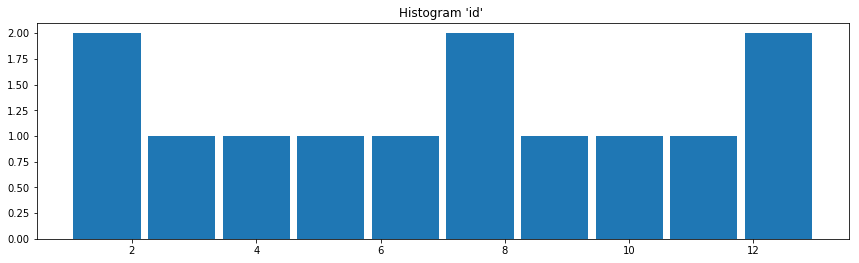

In [30]:
df.plot.hist("id")

In [31]:
df.head()

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up


In [32]:
import pandas as pd
def func(a):
    return a.min() 
df1 = df.map_partitions(func)

In [33]:
print(df1.compute())

id             1.0
billingId    123.0
price          3.0
dtype: float64


In [34]:
df.ext.to_dict()

[OrderedDict([('id', 1),
              ('firstName', 'Luis'),
              ('lastName', 'Alvarez$$%!'),
              ('billingId', 123.0),
              ('product', 'Cake'),
              ('price', 10.0),
              ('birth', '1980/07/07'),
              ('dummyCol', 'never')]),
 OrderedDict([('id', 2),
              ('firstName', 'André'),
              ('lastName', 'Ampère'),
              ('billingId', 423.0),
              ('product', 'piza'),
              ('price', 8.0),
              ('birth', '1950/07/08'),
              ('dummyCol', 'gonna')]),
 OrderedDict([('id', 3),
              ('firstName', 'NiELS'),
              ('lastName', 'Böhr//((%%'),
              ('billingId', 551.0),
              ('product', 'pizza'),
              ('price', 8.0),
              ('birth', '1990/07/09'),
              ('dummyCol', 'give')]),
 OrderedDict([('id', 4),
              ('firstName', 'PAUL'),
              ('lastName', 'dirac$'),
              ('billingId', 521.0),
              (

In [35]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [16]:
df.cols.max(["id","billingId"])

{'id': {'max': 13.0}, 'billingId': {'max': 992.0}}

In [17]:
df.cols.count_na("*")

{'id': {'count_na': 0},
 'firstName': {'count_na': 1},
 'lastName': {'count_na': 1},
 'billingId': {'count_na': 1},
 'product': {'count_na': 1},
 'price': {'count_na': 1},
 'birth': {'count_na': 1},
 'dummyCol': {'count_na': 1}}

In [18]:
df.cols.max("*")

{'id': {'max': 13.0}, 'billingId': {'max': 992.0}, 'price': {'max': 10.0}}

In [19]:
df.cols.kurt("id")

{'id': 1.7857142857142858}

In [20]:
df.cols.range("id")

{'id': {'min': 1, 'max': 13}}

In [21]:
import pandas as pd
import dask
    
dict = {'Geeks' : 10, 
        'for' : 20, 
        'geeks' : 30}

from dask import dataframe as dd
# func = df[col].nunique
ps = [{col:df[col].nunique()} for col in df.cols.names()]
b= {"count_uniques":ps}
dd.compute(b)
print(b)
# df["id"].nunique().compute()

dd.compute(b)

{'count_uniques': [{'id': dd.Scalar<series-..., dtype=int32>}, {'firstName': dd.Scalar<series-..., dtype=int32>}, {'lastName': dd.Scalar<series-..., dtype=int32>}, {'billingId': dd.Scalar<series-..., dtype=int32>}, {'product': dd.Scalar<series-..., dtype=int32>}, {'price': dd.Scalar<series-..., dtype=int32>}, {'birth': dd.Scalar<series-..., dtype=int32>}, {'dummyCol': dd.Scalar<series-..., dtype=int32>}]}


({'count_uniques': [{'id': 13},
   {'firstName': 12},
   {'lastName': 12},
   {'billingId': 12},
   {'product': 7},
   {'price': 5},
   {'birth': 12},
   {'dummyCol': 8}]},)

In [22]:
d = {'count_uniques': {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}}
d1 = {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}

In [23]:
list(d.values())[0]

{'id': 13.001289538211168,
 'firstName': 13.001289538211168,
 'lastName': 13.001289538211168,
 'billingId': 13.001289538211168,
 'product': 8.000488320990067,
 'price': 6.000274674963478,
 'birth': 13.001289538211168,
 'dummyCol': 9.000618037546497}

In [24]:
c = next(iter(d))
asd = pd.Series(d[c])
print(asd)
for a in asd.index:
    print(a)
    print(asd[a])

id           13.001290
firstName    13.001290
lastName     13.001290
billingId    13.001290
product       8.000488
price         6.000275
birth        13.001290
dummyCol      9.000618
dtype: float64
id
13.001289538211168
firstName
13.001289538211168
lastName
13.001289538211168
billingId
13.001289538211168
product
8.000488320990067
price
6.000274674963478
birth
13.001289538211168
dummyCol
9.000618037546497


In [35]:
df.cols.min("*")

COL_NAME id             1.0
billingId    123.0
price          3.0
dtype: float64


{'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}

In [36]:
df.cols.count_uniques("*")

COL_NAME {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}


{'id': 13.001289538211168,
 'firstName': 13.001289538211168,
 'lastName': 13.001289538211168,
 'billingId': 13.001289538211168,
 'product': 8.000488320990067,
 'price': 6.000274674963478,
 'birth': 13.001289538211168,
 'dummyCol': 9.000618037546497}

In [81]:
df.cols.percentile("*")

COL_NAME       id  billingId  price
0.5  7.0      587.5    8.0
PERCENTILE 1       id  billingId  price
0.5  7.0      587.5    8.0
PERCENTILE       id  billingId  price
0.5  7.0      587.5    8.0
<class 'dict'>
RESULT {'id': {'percentile': {'0.5': 7.0}}, 'billingId': {'percentile': {'0.5': 587.5}}, 'price': {'percentile': {'0.5': 8.0}}}


{'id': {'percentile': {'0.5': 7.0}},
 'billingId': {'percentile': {'0.5': 587.5}},
 'price': {'percentile': {'0.5': 8.0}}}

In [37]:
df.cols.count_na("*")

<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME firstName
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME lastName
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME billingId
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME product
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME price
COL 

{'id': {'count_na': 0},
 'firstName': {'count_na': 1},
 'lastName': {'count_na': 1},
 'billingId': {'count_na': 1},
 'product': {'count_na': 1},
 'price': {'count_na': 1},
 'birth': {'count_na': 1},
 'dummyCol': {'count_na': 1}}

In [36]:
df = df.ext.send(output="json", infer=False, advanced_stats=False)

<class 'dict'>
COL NAME id
COL NAME RESULT {'id': 13.001289538211168, 'firstName': 13.001289538211168, 'lastName': 13.001289538211168, 'billingId': 13.001289538211168, 'product': 8.000488320990067, 'price': 6.000274674963478, 'birth': 13.001289538211168, 'dummyCol': 9.000618037546497}
AGG NAME count_uniques


TypeError: 'numpy.float64' object is not iterable

In [ ]:
df.ext.display()

In [59]:
df["firstName"].min().compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x000001376AF3B708>, <function _reduction_aggregate at 0x000001376DD36048>, [(<function _concat at 0x000001376C680048>, [(<function apply at 0x000001376AF3B708>, <function _reduction_chunk at 0x000001376DD35EE8>, [(<built-in function getitem>, (<function check_meta at 0x000001376DC9AF78>, (<function apply at 0x000001376AF3B708>, <function pandas_read_text at 0x000001376DD5DB88>, [<function _make_parser_function.<locals>.parser_f at 0x000001376D8F84C8>, (<function read_block_from_file at 0x000001376DB1B798>, <dask.bytes.core.OpenFile object at 0x0000013701F15948>, 0, 64000000, b'\n'), b'id,firstName,lastName,billingId,product,price,birth,dummyCol\n', (<class 'dict'>, [['sep', ','], ['header', 0], ['encoding', 'UTF-8'], ['na_values', 'None']]), (<class 'dict'>, [['id', dtype('int64')], ['firstName', dtype('O')], ['lastName', dtype('O')], ['billingId', dtype('float64')], ['product', dtyp

TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
df.cols.zero

In [153]:
import dask.array as da
x = da.random.random((2, 2), chunks=(5, 5))

In [154]:
for i in x:
    print(i)

dask.array<getitem, shape=(2,), dtype=float64, chunksize=(2,)>
dask.array<getitem, shape=(2,), dtype=float64, chunksize=(2,)>


In [75]:
df.cols.skewness(["id","price"])

COL_NAME {'id': 0.0, 'price': nan}
<class 'dict'>
COL NAME 1- id
VALUE 1- 0.0
AGG NAME 1- skewness
****
COL NAME 1- price
VALUE 1- nan
AGG NAME 1- skewness
****
RESULT {'id': {'skewness': 0.0}, 'price': {'skewness': nan}}


{'id': {'skewness': 0.0}, 'price': {'skewness': nan}}

In [74]:
df.cols.kurt(["id"])

COL_NAME {'id': 1.7857142857142858}
<class 'dict'>
COL NAME 1- id
VALUE 1- 1.7857142857142858
AGG NAME 1- kurtosis
****
RESULT {'id': {'kurtosis': 1.7857142857142858}}


{'id': {'kurtosis': 1.7857142857142858}}

In [76]:
exprs=[]
from dask import dataframe as dd
# funcs = [df.functions.stddev, df.functions.kurtosis, df.functions.mean, df.functions.skewness,
#                          df.functions.sum, df.functions.variance, df.functions.zeros_agg]

funcs = [df.functions.stddev, df.functions.kurtosis, df.functions.mean, df.functions.skewness,df.functions.sum, df.functions.variance, df.functions.zeros_agg]

z = df.cols.agg_exprs(["id","price"], funcs, df)

dd.compute(z)

COL_NAME {'id': 0.0, 'price': nan}
<class 'dict'>
COL NAME 1- id
VALUE 1- 0.0
AGG NAME 1- skewness
****
COL NAME 1- price
VALUE 1- nan
AGG NAME 1- skewness
****
RESULT {'id': {'skewness': 0.0}, 'price': {'skewness': nan}}
COL_NAME {'id': 1.7857142857142858, 'price': nan}
<class 'dict'>
COL NAME 1- id
VALUE 1- 1.7857142857142858
AGG NAME 1- kurtosis
****
COL NAME 1- price
VALUE 1- nan
AGG NAME 1- kurtosis
****
RESULT {'id': {'skewness': 0.0, 'kurtosis': 1.7857142857142858}, 'price': {'skewness': nan, 'kurtosis': nan}}
COL_NAME id       15.166667
price     7.719697
dtype: float64
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id       15.166667
price     7.719697
dtype: float64
AGG NAME variance
****
COL NAME price
COL NAME RESULT id       15.166667
price     7.719697
dtype: float64
AGG NAME variance
****
RESULT {'id': {'skewness': 0.0, 'kurtosis': 1.7857142857142858, 'variance': 15.166666666666666}, 'price': {'skewness': nan, 'kurtosis': nan, 'variance': 7.7196969696969

({'id': {'skewness': 0.0,
   'kurtosis': 1.7857142857142858,
   'variance': 15.166666666666666,
   'sum': 91.0,
   'mean': 7.0,
   'stddev': 3.8944404818493075,
   'zeros': 0},
  'price': {'skewness': nan,
   'kurtosis': nan,
   'variance': 7.719696969696966,
   'sum': 77.0,
   'mean': 6.416666666666667,
   'stddev': 2.7784342658585546,
   'zeros': 0}},)

In [187]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [79]:
df.cols.mad("id")

{'id': {'id': {'mad': 3.0}}}

In [80]:
df.cols.hist("id")

COL_NAME id    1
dtype: int64
<class 'pandas.core.series.Series'>
RESULT {'id': {'min': 1}}
COL_NAME id    13
dtype: int64
<class 'pandas.core.series.Series'>
RESULT {'id': {'min': 1, 'max': 13}}
COL_NAME {'id': {'count': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 'bins': [1.0, 1.6, 2.2, 2.8, 3.4, 4.0, 4.6, 5.2, 5.8, 6.3999999999999995, 7.0, 7.6, 8.2, 8.8, 9.4, 10.0, 10.6, 11.2, 11.799999999999999, 12.4, 13.0]}}
<class 'dict'>
RESULT {'id': {'hist': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6}, {'count': 1, 'lower': 1.6, 'upper': 2.2}, {'count': 0, 'lower': 2.2, 'upper': 2.8}, {'count': 1, 'lower': 2.8, 'upper': 3.4}, {'count': 0, 'lower': 3.4, 'upper': 4.0}, {'count': 1, 'lower': 4.0, 'upper': 4.6}, {'count': 1, 'lower': 4.6, 'upper': 5.2}, {'count': 0, 'lower': 5.2, 'upper': 5.8}, {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995}, {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0}, {'count': 1, 'lower': 7.0, 'upper': 7.6}, {'count': 1, 'lower': 7.6

{'id': {'hist': {'hist': [{'count': 1, 'lower': 1.0, 'upper': 1.6},
    {'count': 1, 'lower': 1.6, 'upper': 2.2},
    {'count': 0, 'lower': 2.2, 'upper': 2.8},
    {'count': 1, 'lower': 2.8, 'upper': 3.4},
    {'count': 0, 'lower': 3.4, 'upper': 4.0},
    {'count': 1, 'lower': 4.0, 'upper': 4.6},
    {'count': 1, 'lower': 4.6, 'upper': 5.2},
    {'count': 0, 'lower': 5.2, 'upper': 5.8},
    {'count': 1, 'lower': 5.8, 'upper': 6.3999999999999995},
    {'count': 0, 'lower': 6.3999999999999995, 'upper': 7.0},
    {'count': 1, 'lower': 7.0, 'upper': 7.6},
    {'count': 1, 'lower': 7.6, 'upper': 8.2},
    {'count': 0, 'lower': 8.2, 'upper': 8.8},
    {'count': 1, 'lower': 8.8, 'upper': 9.4},
    {'count': 0, 'lower': 9.4, 'upper': 10.0},
    {'count': 1, 'lower': 10.0, 'upper': 10.6},
    {'count': 1, 'lower': 10.6, 'upper': 11.2},
    {'count': 0, 'lower': 11.2, 'upper': 11.799999999999999},
    {'count': 1, 'lower': 11.799999999999999, 'upper': 12.4},
    {'count': 1, 'lower': 12.4, 'uppe

In [98]:
df.plot.hist("id")

AttributeError: 'DataFrame' object has no attribute 'plot'

In [26]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [31]:
df.cols.std("firstName")

ValueError: 'columns' must be 'not None', received 'None'

In [25]:
from optimus.profiler.profiler import Profiler
p = Profiler()
p.run(df,"firstName", advanced_stats=True)
# p.columns_agg(df,"*", advanced_stats=False)

ValueError: 'missing_columns' must be 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location', received 'firstName'

In [ ]:
p.send()

In [77]:
df.ext.send()

COL_NAME id             1.0
billingId    123.0
price          3.0
dtype: float64
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME billingId
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME price
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
RESULT {'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}
COL_NAME id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id           0
firstName    1
lastName     1
billingId    1
product      1
price        1
birth        1
dummyCol     1
dtype: int64
AGG NAME count_na
****
COL NAME firstName
COL NAME RESULT id           0
firstName    1
lastName    

SEND {"count_types": {"int": 1, "object": 5, "float": 2, "array": 0, "binary": 0, "numeric": 0, "categorical": 0, "null": 0, "date": 0}, "total_count_dtypes": 3, "dtypes_list": ["int", "object", "float"], "columns": {"id": {"stats": {"min": 1.0, "count_na": null, "max": 13.0, "count_uniques": 13.001289538211168, "hist": {"count": [null, null, null, null, null, null, null, null, null, null, null, null], "bins": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]}}, "name": "id", "column_dtype": "int", "dtypes_stats": {"int": null, "float": 0, "object": 0}, "column_type": "numeric", "id": null}, "firstName": {"stats": {"count_na": null, "count_uniques": 13.001289538211168}, "name": "firstName", "column_dtype": "object", "dtypes_stats": {"int": 0, "float": 0, "object": null}, "column_type": null, "id": null}, "lastName": {"stats": {"count_na": null, "count_uniques": 13.001289538211168}, "name": "lastName", "column_dtype": "object", "dtypes_stats": {"int": 0, "float": 0, 

Send!


In [5]:
op= Optimus("dask", comm=True)

In [124]:
# url = "https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/crime.csv"
url = "data/crime.csv"

In [125]:
import pandas as pd
pd.read_csv(url, encoding='latin1')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [126]:
from dask import dataframe as dd
df = dd.read_csv(url, encoding='latin1').reset_index()

In [127]:
df.rows.limit(5).ext.display()

index 1 (int64) not nullable,INCIDENT_NUMBER 2 (object) not nullable,OFFENSE_CODE 3 (int64) not nullable,OFFENSE_CODE_GROUP 4 (object) not nullable,OFFENSE_DESCRIPTION 5 (object) not nullable,DISTRICT 6 (object) not nullable,REPORTING_AREA 7 (object) not nullable,SHOOTING 8 (object) not nullable,OCCURRED_ON_DATE 9 (object) not nullable,YEAR 10 (int64) not nullable,MONTH 11 (int64) not nullable,DAY_OF_WEEK 12 (object) not nullable,HOUR 13 (int64) not nullable,UCR_PART 14 (object) not nullable,STREET 15 (object) not nullable,Lat 16 (float64) not nullable,Long 17 (float64) not nullable,Location 18 (object) not nullable
0,I182070945,619,Larceny,LARCENY⋅ALL⋅OTHERS,D14,808,nan,2018-09-02⋅13:00:00,2018,9,Sunday,13,Part⋅One,LINCOLN⋅ST,42.35779134,-71.13937053,"(42.35779134,⋅-71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,nan,2018-08-21⋅00:00:00,2018,8,Tuesday,0,Part⋅Two,HECLA⋅ST,42.30682138,-71.06030035,"(42.30682138,⋅-71.06030035)"
2,I182070941,3410,Towed,TOWED⋅MOTOR⋅VEHICLE,D4,151,nan,2018-09-03⋅19:27:00,2018,9,Monday,19,Part⋅Three,CAZENOVE⋅ST,42.34658879,-71.07242943,"(42.34658879,⋅-71.07242943)"
3,I182070940,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,D4,272,nan,2018-09-03⋅21:16:00,2018,9,Monday,21,Part⋅Three,NEWCOMB⋅ST,42.33418175,-71.07866441,"(42.33418175,⋅-71.07866441)"
4,I182070938,3114,Investigate⋅Property,INVESTIGATE⋅PROPERTY,B3,421,nan,2018-09-03⋅21:05:00,2018,9,Monday,21,Part⋅Three,DELHI⋅ST,42.27536542,-71.09036101,"(42.27536542,⋅-71.09036101)"


In [129]:
df.cols.min("index")

{'index': {'min': 0}}

In [130]:
df.cols.min("*")

{'index': {'min': 0},
 'INCIDENT_NUMBER': {'min': '142052550'},
 'OFFENSE_CODE': {'min': 111},
 'OFFENSE_CODE_GROUP': {'min': 'Aggravated Assault'},
 'OFFENSE_DESCRIPTION': {'min': 'A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.'},
 'REPORTING_AREA': {'min': ' '},
 'OCCURRED_ON_DATE': {'min': '2015-06-15 00:00:00'},
 'YEAR': {'min': 2015},
 'MONTH': {'min': 1},
 'DAY_OF_WEEK': {'min': 'Friday'},
 'HOUR': {'min': 0},
 'Lat': {'min': -1.0},
 'Long': {'min': -71.17867378},
 'Location': {'min': '(-1.00000000, -1.00000000)'}}

In [132]:
df.cols.percentile("index")

{'index': {'0.5': 159536.0}}

In [133]:
df.cols.percentile("*")

{'index': {'0.5': 159536.0},
 'OFFENSE_CODE': {'0.5': 2907.0},
 'YEAR': {'0.5': 2017.0},
 'MONTH': {'0.5': 7.0},
 'HOUR': {'0.5': 14.0},
 'Lat': {'0.5': 42.32553801},
 'Long': {'0.5': -71.07752376}}

In [134]:
a = {0.25: 3.5, 0.5: 6.0, 0.75: 8.5}

In [135]:
print(a)

{0.25: 3.5, 0.5: 6.0, 0.75: 8.5}


In [136]:
df.rows.select((df["num"] >= 6.8) & (df["num"] <= 99.3)).rows.limit(10).ext.display()

KeyError: 'num'

In [ ]:
df.outliers.tukey("num").select().ext.display()

In [39]:
from dask import dataframe as dd
df = dd.read_csv("data/foo.csv", sep=",").head(20)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 20 elements requested, only 19 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


In [52]:
df.rows.between("id",1,5).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you


In [54]:
df1 = df.rows.append(df)

In [66]:
df1.ext.display()

NameError: name 'df1' is not defined

In [ ]:
#https://github.com/dask/dask/pull/4229#issuecomment-449123512


In [178]:
df["id"].mode().compute()

AttributeError: 'Series' object has no attribute 'mode'

In [114]:
import pandas as pd

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=0)

NameError: name 'pd' is not defined

In [21]:
df.head(20)

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\core.py:4382: UserWarning: Insufficient elements for `head`. 20 elements requested, only 13 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,6,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [19]:
df.cols.names()

['id',
 'firstName',
 'lastName',
 'billingId',
 'product',
 'price',
 'birth',
 'dummyCol']

In [6]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='false', null_value="None")

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [7]:
df.rows.limit(5).cols.lower("lastName").ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,einstein,634.0,pizza,8.0,1990/07/11,up


In [8]:
df.rows.limit(5).cols.min_max_scaler("billingId").ext.display()

..\optimus\engines\base\dask\columns.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  scaler.transform(_df)[input_cols]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [49]:
df.ext.display(13)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [64]:
df.cols.impute("billingId",output_cols="hola").ext.display(13)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable,hola 9 (float64) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never,123.0
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna,423.0
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give,551.0
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you,521.0
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up,634.0
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never,672.0
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna,323.0
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let,624.0
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you,735.0
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down,875.0


In [ ]:
df.cols.impute("billingId",output_cols="new_col").ext.display(13)

In [140]:
df.cols.count_na("*")

{'INCIDENT_NUMBER': {'count_na': 0},
 'OFFENSE_CODE': {'count_na': 0},
 'OFFENSE_CODE_GROUP': {'count_na': 0},
 'OFFENSE_DESCRIPTION': {'count_na': 0},
 'DISTRICT': {'count_na': 1765},
 'REPORTING_AREA': {'count_na': 0},
 'SHOOTING': {'count_na': 318054},
 'OCCURRED_ON_DATE': {'count_na': 0},
 'YEAR': {'count_na': 0},
 'MONTH': {'count_na': 0},
 'DAY_OF_WEEK': {'count_na': 0},
 'HOUR': {'count_na': 0},
 'UCR_PART': {'count_na': 90},
 'STREET': {'count_na': 10871},
 'Lat': {'count_na': 19999},
 'Long': {'count_na': 19999},
 'Location': {'count_na': 0}}

In [21]:
import pandas as pd
data = {'col_0': [9, -3, 0, -1, 5], 'col_1': [-2, -7, 6, 8, -5]}
df = pd.DataFrame(data)
df.head()

,col_0,col_1
0,9,-2
1,-3,-7
2,0,6
3,-1,8
4,5,-5


In [25]:
df["col_0"].clip( 1, 5)

0    5
1    1
2    1
3    1
4    5
Name: col_0, dtype: int64

In [31]:
df.head(10)

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,5,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,5,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,5,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,5,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,5,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [34]:
df = op.load.csv("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv", sep=",", header=True, infer_schema='false', null_value="None")

https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv


In [54]:
df.cols.min("id")

{'min': {'id': 1, 'min': [('min', id    1
    dtype: int64)]}}

In [54]:
df.cols.min("*")

COL_NAME id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
<class 'pandas.core.series.Series'>
COL NAME id
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME billingId
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
COL NAME price
COL NAME RESULT id             1.0
billingId    123.0
price          3.0
dtype: float64
AGG NAME min
****
RESULT {'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}


{'id': {'min': 1.0}, 'billingId': {'min': 123.0}, 'price': {'min': 3.0}}

In [55]:
df.cols.percentile("id")

COL_NAME 0.5    7.0
Name: id, dtype: float64
AGG NAME percentile
<class 'pandas.core.series.Series'>
COL NAME 0.5
COL NAME RESULT 0.5    7.0
Name: id, dtype: float64
AGG NAME percentile
****
RESULT {0.5: {'percentile': 7.0}}


{0.5: {'percentile': 7.0}}

In [47]:
df.cols.iqr(["id","price"])

<class 'dict'>
INDEX {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}
COL NAME id
COL NAME RESULT {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}
AGG NAME percentile
****
COL NAME price
COL NAME RESULT {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}
AGG NAME percentile
****
RESULT {'id': {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}, 'price': {'id': {'0.25': 4.0, '0.5': 7.0, '0.75': 10.0}, 'price': {'0.25': 3.0, '0.5': 8.0, '0.75': 8.25}}}


KeyError: 'percentile'

In [12]:
df.cols.min("*")

{'min': {'id': 1.0, 'billingId': 123.0, 'price': 3.0}}

In [38]:
df.head(12)

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,5,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,5,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,5,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,5,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,5,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [37]:
df.cols.clip("id",1,5).head(10)

,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
3,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
4,5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
5,5,Galileo,GALiLEI,672.0,arepa,5.0,1930/08/12,never
6,5,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
7,5,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
8,5,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
9,5,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [ ]:
df.cols.qcult()

In [51]:
df.ext.display(13)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [ ]:
pd.DataFrame([[np.nan, 'dogs', 3]], index=df.index)

In [63]:
from sklearn.preprocessing import MinMaxScaler
import dask.dataframe as dd
import dask.array as da

scaler = MinMaxScaler()
columns = ['billingId','price']
b =df[columns]
scaler.fit(b)
c = dd.from_dask_array(da.from_array(scaler.transform(b), chunks=100),columns)

print(c.head())
# df.assign(e=c['price'])


# # print(dd.from_dask_array(c, columns).head(10))
# df[columns]= dd.from_dask_array(c)

   billingId     price
0   0.000000  1.000000
1   0.345224  0.714286
2   0.492520  0.714286
3   0.457998  0.714286
4   0.588032  0.714286


In [63]:
print(df1)

[[0.         1.        ]
 [0.3452244  0.71428571]
 [0.49252014 0.71428571]
 [0.4579977  0.71428571]
 [0.58803222 0.71428571]
 [0.63176064 0.28571429]
 [0.2301496  0.        ]
 [0.57652474 0.        ]
 [0.70425777 0.        ]
 [0.86536249 0.        ]
 [1.         0.85714286]
 [0.12773303 0.85714286]
 [       nan        nan]]


In [ ]:
df.ext.display()

In [10]:
df.ext.sample(5).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down
12,Emmy%%,Nöether$,234.0,pasta,9.0,1993/12/08,gonna
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up


In [23]:
df.ext.stratified_sample("firstName").ext.display()

..\optimus\engines\dask\extension.py:156: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  df_ = df.groupby(col_name).apply(lambda x: x.sample(2))
distributed.worker - WARNING -  Compute Failed
Function:  subgraph_callable
args:      ()
kwargs:    {}
Exception: ValueError("Cannot take a larger sample than population when 'replace=False'")



ValueError: Cannot take a larger sample than population when 'replace=False'

In [15]:
df.rows.limit(5).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never


In [7]:
df.cols.min("")

TypeError: min() missing 1 required positional argument: 'columns'

In [21]:
df.rows.sort("billingId","asc").ext.display()

TypeError: Can't instantiate abstract class Cols with abstract methods apply_by_dtypes, apply_expr, astype, boxplot, bucketizer, cell, clip, copy, correlation, count_mismatch, count_na, count_uniques, count_zeros, drop, frequency_by_group, get_meta, impute, index_to_string, iqr, is_na, keep, max_abs_scaler, min_max_scaler, move, nunique, qcut, remove, remove_accents, remove_special_chars, remove_white_spaces, replace_regex, reverse, scatter, select_by_dtypes, set, set_meta, sort, string_to_index, to_timestamp, unique, value_counts, values_to_cols, years_between, z_score

In [36]:
df.cols.max("price")

{'max': {'price': 10.0}}

In [ ]:

df.cols.create_expr()

In [30]:
df.dropna(how='any', subset=['price'])

,id,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,float64,object,float64,object,object
,...,...,...,...,...,...,...,...


In [32]:
df.rows.drop_na("price").ext.display()

any price


id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [ ]:
df[col_name].dtype
# format_dict([np.dtype(df[col_name].dtype).type for col_name in columns])

In [12]:
c = df.cols.names()

In [9]:
df.set_index("billingId").reset_index()[c].head()

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,12,Emmy%%,Nöether$,234.0,pasta,9.0,1993/12/08,gonna
2,7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
3,2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
4,4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you


In [172]:
df.cols.mode("id")

,price
price,
3.0,3.0
5.0,5.0
8.0,8.0
9.0,9.0
10.0,10.0


In [132]:
df.ext.display(20)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,André,Ampère,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,Böhr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [103]:
df1= op.load.csv("data/foo.csv", sep=",", header=True, infer_schema='true', charset="ISO-8859–1", null_value="None")

data/foo.csv


In [108]:
df1.ext.display(20)

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (int64) not nullable,product 5 (object) not nullable,price 6 (int64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423,piza,8,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672,arepa,5,1930/08/12,never
7,CaRL,Ga%%%uss,323,taco,3,1970/07/13,gonna
8,David,H$$$ilbert,624,taaaccoo,3,1950/07/14,let
9,Johannes,KEPLER,735,taco,3,1920/04/22,you
10,JaMES,M$$ax%%well,875,taco,3,1923/03/12,down


In [70]:
df.cols.dtypes()

{'id': 'int64',
 'firstName': 'object',
 'lastName': 'object',
 'billingId': 'float64',
 'product': 'object',
 'price': 'float64',
 'birth': 'object',
 'dummyCol': 'object'}

In [65]:
df.ext.display(20)

20


id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [8]:
df.save.csv("data/dask/*.csv")

In [9]:
df.save.parquet("data/dask/foo.parquet")

In [11]:
df.save.json("data/dask/*.json")

In [12]:
df.rows.create_id()

Dask DataFrame Structure:
                  id firstName lastName billingId product    price   birth dummyCol
npartitions=1                                                                      
               int64    object   object   float64  object  float64  object   object
                 ...       ...      ...       ...     ...      ...     ...      ...
Dask Name: from-delayed, 3 tasks


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [36]:
df1 = df[(df.id > 0) & (df.id <= 7)]
df2 = df1[(df.id > 0) & (df.id <= 3)]

In [38]:
df2.compute().head()

C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\utils.py:694: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return getattr(obj, self.method)(*args, **kwargs)


,id,firstName,lastName,billingId,product,price,birth,dummyCol
0,1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
1,2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
2,3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give


In [61]:
df.rows.select((df.id ==1 ) ).ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never


In [58]:
df.rows.select_by_dtypes("id", "str").ext.display()

AttributeError: 'NoneType' object has no attribute '_jvm'

In [59]:
df.set_index('price').compute()

C:\Users\argenisleon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,firstName,lastName,billingId,product,birth,dummyCol
price,,,,,,,
3.0,7,CaRL,Ga%%%uss,323.0,taco,1970/07/13,gonna
3.0,8,David,H$$$ilbert,624.0,taaaccoo,1950/07/14,let
3.0,9,Johannes,KEPLER,735.0,taco,1920/04/22,you
3.0,10,JaMES,M$$ax%%well,875.0,taco,1923/03/12,down
5.0,6,Galileo,GALiLEI,672.0,arepa,1930/08/12,never
8.0,2,AndrÃ©,AmpÃ¨re,423.0,piza,1950/07/08,gonna
8.0,3,NiELS,BÃ¶hr//((%%,551.0,pizza,1990/07/09,give
8.0,4,PAUL,dirac$,521.0,pizza,1954/07/10,you
8.0,5,Albert,Einstein,634.0,pizza,1990/07/11,up


In [8]:
%%time
df.cols.min(["billingId"])

Wall time: 195 ms


{'min': {'billingId': 123.0}}

In [9]:
%%time
df.cols.max(["billingId"])

Wall time: 152 ms


{'max': {'billingId': 992.0}}

In [10]:
df.cols.names()

['id',
 'firstName',
 'lastName',
 'billingId',
 'product',
 'price',
 'birth',
 'dummyCol']

In [11]:
df.meta.get()

{'file_name': 'foo.csv', 'transformations': {'actions': {}}}

In [127]:
df.cols.rename("id", "id1")

,id1,firstName,lastName,billingId,product,price,birth,dummyCol
npartitions=1,,,,,,,,
,int64,object,object,float64,object,float64,object,object
,...,...,...,...,...,...,...,...


In [13]:
df.ext.display("all")

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [20]:
df.cols.remove_special_chars("lastName")

AttributeError: 'Cols' object has no attribute 'remove_special_chars'

In [15]:
df.ext.send()

AttributeError: type object 'Profiler' has no attribute 'instance'

In [24]:
df.ext.display()

id 1 (int64) not nullable,firstName 2 (object) not nullable,lastName 3 (object) not nullable,billingId 4 (float64) not nullable,product 5 (object) not nullable,price 6 (float64) not nullable,birth 7 (object) not nullable,dummyCol 8 (object) not nullable
1,Luis,Alvarez$$%!,123.0,Cake,10.0,1980/07/07,never
2,AndrÃ©,AmpÃ¨re,423.0,piza,8.0,1950/07/08,gonna
3,NiELS,BÃ¶hr//((%%,551.0,pizza,8.0,1990/07/09,give
4,PAUL,dirac$,521.0,pizza,8.0,1954/07/10,you
5,Albert,Einstein,634.0,pizza,8.0,1990/07/11,up
6,Galileo,⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅GALiLEI,672.0,arepa,5.0,1930/08/12,never
7,CaRL,Ga%%%uss,323.0,taco,3.0,1970/07/13,gonna
8,David,H$$$ilbert,624.0,taaaccoo,3.0,1950/07/14,let
9,Johannes,KEPLER,735.0,taco,3.0,1920/04/22,you
10,JaMES,M$$ax%%well,875.0,taco,3.0,1923/03/12,down


In [236]:
df.cols.replace("lastName","$", "","chars")

ValueError: 'missing_columns' must be 'INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location', received 'lastName'. 

In [9]:
from optimus.profiler.profiler import Profiler
p = Profiler()

df.cols.count_by_dtypes("*")

{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'

{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'}
{'id': 'int64', 'firstName': 'object', 'lastName': 'object', 'billingId': 'float64', 'product': 'object', 'price': 'float64', 'birth': 'object', 'dummyCol': 'object'

{'id': {'int': 0, 'float': 0, 'object': 0},
 'firstName': {'int': 0, 'float': 0, 'object': 0},
 'lastName': {'int': 0, 'float': 0, 'object': 0},
 'billingId': {'int': 0, 'float': 0, 'object': 0},
 'product': {'int': 0, 'float': 0, 'object': 0},
 'price': {'int': 0, 'float': 0, 'object': 0},
 'birth': {'int': 0, 'float': 0, 'object': 0},
 'dummyCol': {'int': 0, 'float': 0, 'object': 0}}

In [1]:
import dask
import dask.datasets
import numpy as np
import time
from distributed import Client

client = Client()
client

df = dask.datasets.timeseries()
df = df.repartition(npartitions=300)
df = client.persist(df)


C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\io\demo.py:91: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=partition_freq))
C:\Users\argenisleon\Anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


In [4]:
def random_indexer(df):
    indexer = ~df.index.isnull()
    for i in range(np.random.randint(15)+1):
        col = np.random.choice(['x','y'])
        value = np.random.uniform(-1,1)
        op = np.random.choice([lambda x, y: x < y, lambda x, y: x > y])
        indexer = np.logical_and(indexer, op(df[col], value))
    return indexer

def random_statistic(indexer, df):
    print(indexer)
    col = np.random.choice(['x', 'y', 'name'])
    if col == 'name':
        op = np.random.choice([lambda x: x.unique().size, np.min, np.max])
    else:
        op = np.random.choice([lambda x: x.unique().size, np.min, np.max, np.sum, np.mean])
    return op(df[col][indexer])

np.random.seed(137)

stats = []
for i in range(10):
    ind = random_indexer(df)
    for k in range(20):
        stats.append(random_statistic(ind, df))

st = time.time()
print(stats)
# stat_computed = client.compute(stats)
ft = time.time()
print(ft-st)

st = time.time()
# stat_results = client.gather(stat_computed)
ft = time.time()
print(ft-st)

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 10800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 2100 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: x, dtype: bool
Dask Name: logical_and, 7800 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 6600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00    bool
2000-01-01 02:24:00     ...
                       ... 
2000-01-30 21:36:00     ...
2000-01-31 00:00:00     ...
Name: y, dtype: bool
Dask Name: logical_and, 9600 tasks
Dask Series Structure:
npartitions=300
2000-01-01 00:00:00  

In [9]:
df.head()

CancelledError: ('repartition-merge-39715e6237c8baf832ed85d511f135a3', 0)

NameError: name 'op' is not defined

In [14]:
stat_computed = client.compute(np.mode(df["id"]))
stat_results = client.gather(stat_computed)

AttributeError: module 'numpy' has no attribute 'mode'

In [13]:
print(stat_results)

1
